### Import Libraries

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from kneed import KneeLocator

### Load data and check shape, info, missing values and duplicates

In [69]:
# Set pandas to display all columns
pd.set_option('display.max_columns', None)

#Loading the data
data= pd.read_csv("habsos.csv", low_memory=False)

In [70]:
#Filtering data for Florida

data= data[data["STATE_ID"]== "FL"].reset_index(drop=True)

In [71]:
#Checking first 5 rows of the data
data.head(5)

STATE_ID                     DESCRIPTION  Unnamed: 2  LATITUDE  LONGITUDE  \
0       FL  off New Smyrna Beach; Atlantic         NaN   29.1746   -78.2789   
1       FL     off Daytona Beach; Atlantic         NaN   28.9822   -78.3590   
2       FL     off Daytona Beach; Atlantic         NaN   29.0000   -78.4700   
3       FL    off Cape Canaveral; Atlantic         NaN   28.5350   -78.5570   
4       FL    off Cape Canaveral; Atlantic         NaN   28.1060   -78.8310   

  SAMPLE_DATE SAMPLE_TIME  SAMPLE_DEPTH    GENUS SPECIES      CATEGORY  \
0  1990/12/20         NaN           0.5  Karenia  brevis  not observed   
1  1990/12/20         NaN           0.5  Karenia  brevis      very low   
2  1991/08/19       10:52           0.5  Karenia  brevis  not observed   
3  1990/12/20         NaN           0.5  Karenia  brevis      very low   
4  1990/12/21         NaN           0.5  Karenia  brevis  not observed   

   CELLCOUNT CELLCOUNT_UNIT  CELLCOUNT_QA  SALINITY SALINITY_UNIT  \
0          0        cells/L           1.0       NaN           NaN   
1          5        cells/L           1.0       NaN           NaN   
2          0        cells/L           1.0       NaN           NaN   
3          3        cells/L           1.0       NaN           NaN   
4          0        cells/L           1.0       NaN           NaN   

   SALINITY_QA  WATER_TEMP WATER_TEMP_UNIT  WATER_TEMP_QA  WIND_DIR  \
0            9        24.2          deg. C              1       NaN   
1            9        25.9          deg. C              1       NaN   
2            9        30.0          deg. C              1       NaN   
3            9        24.0          deg. C              1       NaN   
4            9        24.9          deg. C              1       NaN   

  WIND_DIR_UNIT  WIND_DIR_QA  WIND_SPEED WIND_SPEED_UNIT  WIND_SPEED_QA  \
0           NaN            9         NaN             NaN              9   
1           NaN            9         NaN             NaN              9   
2           NaN            9         NaN             NaN              9   
3           NaN            9         NaN             NaN              9   
4           NaN            9         NaN             NaN              9   

   OBJECTID  Unnamed: 27  
0   1590299          NaN  
1   1590298          NaN  
2   1644042          NaN  
3   1590297          NaN  
4   1590306          NaN

In [72]:
#Checking the number of columns and rows in the data
data.shape

(205168, 28)

In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205168 entries, 0 to 205167
Data columns (total 28 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   STATE_ID         205168 non-null  object 
 1   DESCRIPTION      205160 non-null  object 
 2   Unnamed: 2       0 non-null       float64
 3   LATITUDE         205168 non-null  float64
 4   LONGITUDE        205168 non-null  float64
 5   SAMPLE_DATE      205168 non-null  object 
 6   SAMPLE_TIME      158433 non-null  object 
 7   SAMPLE_DEPTH     204490 non-null  float64
 8   GENUS            205168 non-null  object 
 9   SPECIES          205168 non-null  object 
 10  CATEGORY         205168 non-null  object 
 11  CELLCOUNT        205168 non-null  int64  
 12  CELLCOUNT_UNIT   205168 non-null  object 
 13  CELLCOUNT_QA     205168 non-null  float64
 14  SALINITY         103421 non-null  float64
 15  SALINITY_UNIT    103421 non-null  object 
 16  SALINITY_QA      205168 non-null  int6

In [74]:
#Checking for missing values

data.isna().sum()

STATE_ID                0
DESCRIPTION             8
Unnamed: 2         205168
LATITUDE                0
LONGITUDE               0
SAMPLE_DATE             0
SAMPLE_TIME         46735
SAMPLE_DEPTH          678
GENUS                   0
SPECIES                 0
CATEGORY                0
CELLCOUNT               0
CELLCOUNT_UNIT          0
CELLCOUNT_QA            0
SALINITY           101747
SALINITY_UNIT      101747
SALINITY_QA             0
WATER_TEMP         102896
WATER_TEMP_UNIT    102896
WATER_TEMP_QA           0
WIND_DIR           205168
WIND_DIR_UNIT      205168
WIND_DIR_QA             0
WIND_SPEED         205168
WIND_SPEED_UNIT    205168
WIND_SPEED_QA           0
OBJECTID                0
Unnamed: 27        205168
dtype: int64

In [160]:
#Percentage of missing values for each column

data.isna().mean().sort_values(ascending=False)*100

Unnamed: 27        100.000000
Unnamed: 2         100.000000
WIND_SPEED_UNIT    100.000000
WIND_SPEED         100.000000
WIND_DIR_UNIT      100.000000
WIND_DIR           100.000000
WATER_TEMP_UNIT     50.152070
WATER_TEMP          50.152070
SALINITY_UNIT       49.592042
SALINITY            49.592042
SAMPLE_TIME         22.778893
SAMPLE_DEPTH         0.330461
DESCRIPTION          0.003899
CATEGORY             0.000000
OBJECTID             0.000000
WIND_SPEED_QA        0.000000
LATITUDE             0.000000
LONGITUDE            0.000000
WIND_DIR_QA          0.000000
SAMPLE_DATE          0.000000
WATER_TEMP_QA        0.000000
CELLCOUNT            0.000000
GENUS                0.000000
SALINITY_QA          0.000000
SPECIES              0.000000
CELLCOUNT_QA         0.000000
CELLCOUNT_UNIT       0.000000
STATE_ID             0.000000
dtype: float64

<Axes: >

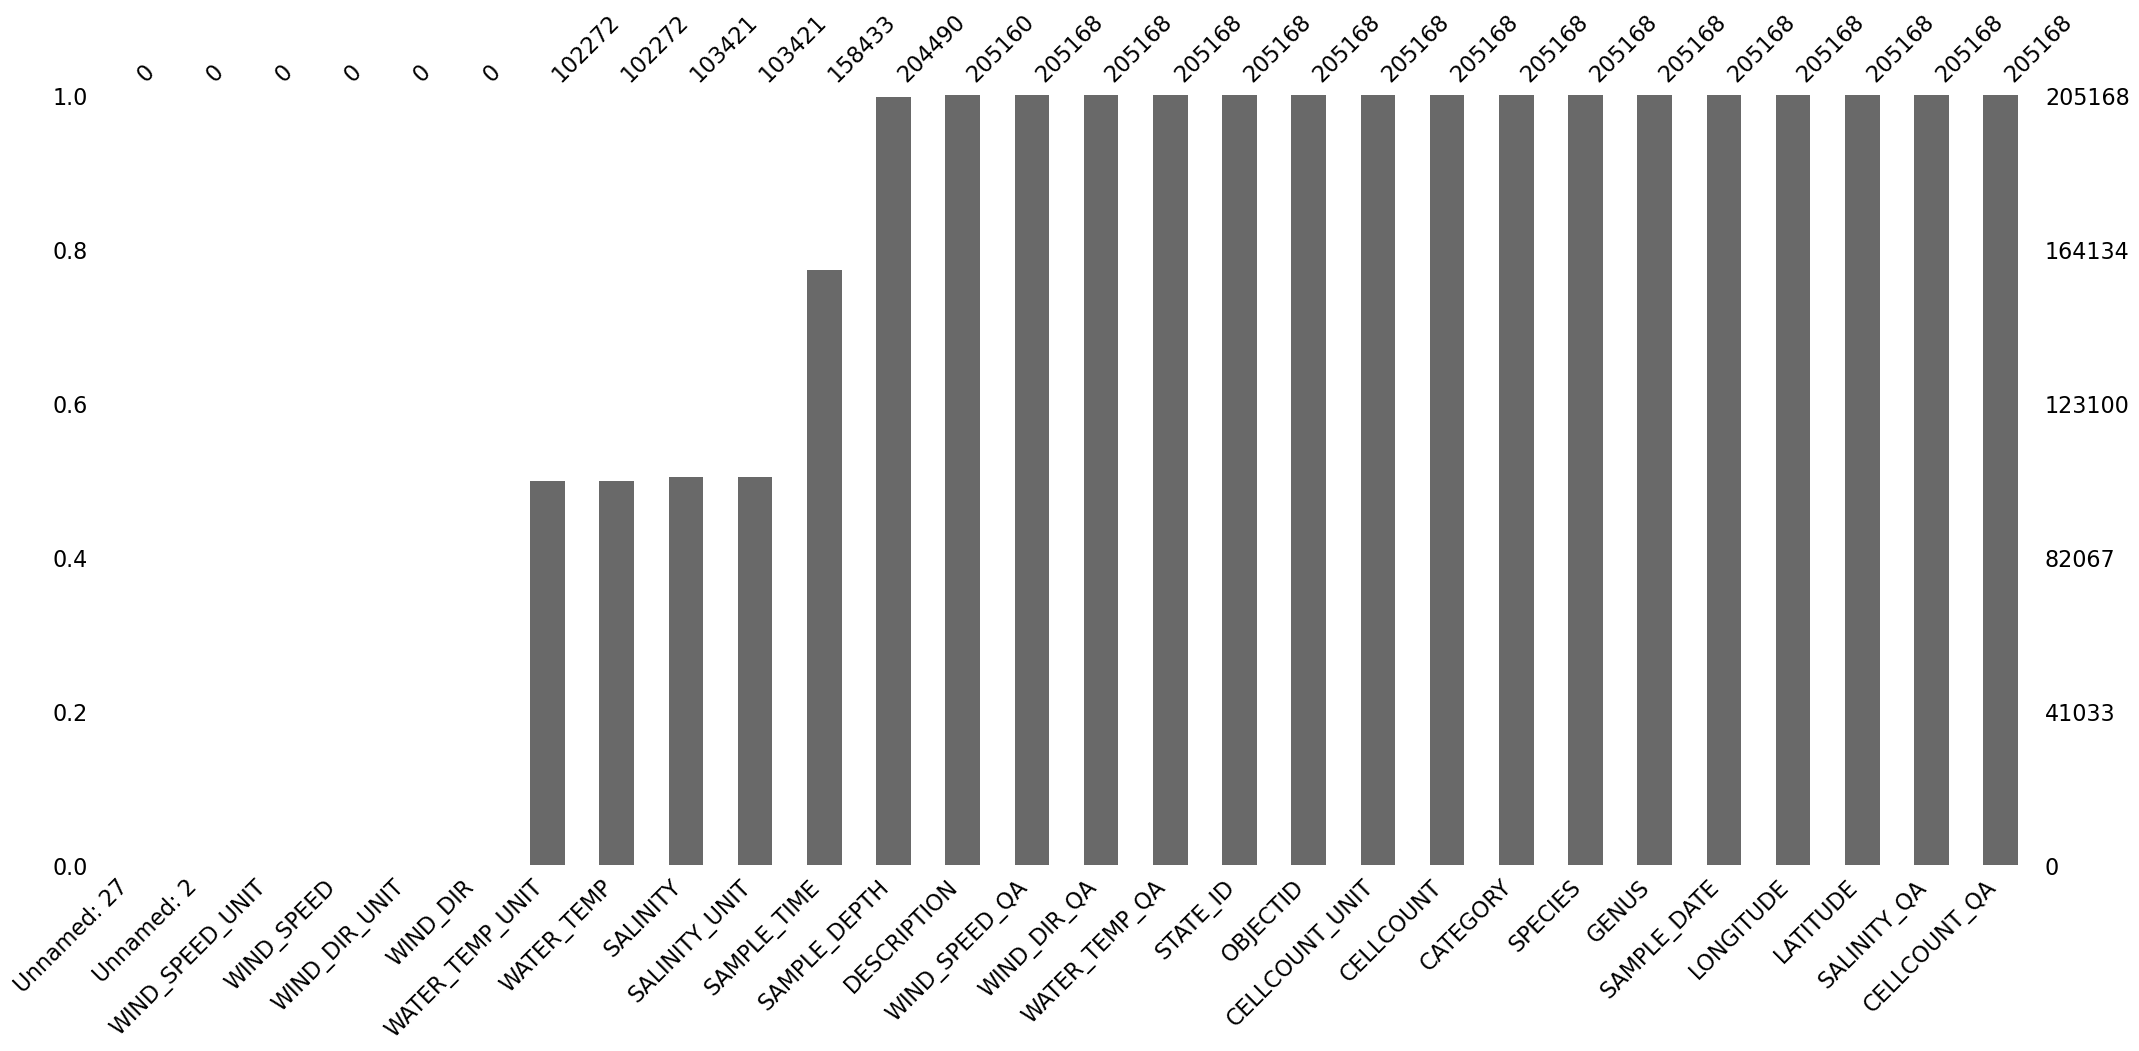

In [76]:
#Plot of Missing data per column
msno.bar(data, sort="ascending")

#### Columns that need to be dropped:
- Unnamed: 27 (100% missing values)
- Unnamed: 2 (100% missing values)
- WIND_DIR (100% missing values)
- WIND_DIR_UNIT (Unit of measurement, deg)
- WIND_DIR_QA (Data quality flag)
- CELLCOUNT_UNIT (Unit of measurement, cells/L)
- CELLCOUNT_QA (Data quality flag)
- SALINITY_UNIT (Unit of measurement, ppt)
- SALINITY_QA (Data quality flag)
- WIND_SPEED (100% missing values)
- WIND_SPEED_UNIT (Unit of measurement, mph)
- WIND_SPEED_QA (Data quality flag)
- WATER_TEMP_UNIT (Unit of measurement, deg C)
- WATER_TEMP_QA (Data quality flag)
- OBJECTID

In [77]:
#Dropping Irrelevant Columns
new_df= data.drop(['Unnamed: 27', 'Unnamed: 2', 'WIND_DIR', 'WIND_DIR_UNIT', 'WIND_DIR_QA', 'CELLCOUNT_UNIT', 'CELLCOUNT_QA', 'SALINITY_UNIT', 'SALINITY_QA', 'WIND_SPEED', 'WIND_SPEED_UNIT', 'WIND_SPEED_QA', 'WATER_TEMP_UNIT', 'WATER_TEMP_QA', 'OBJECTID' ], axis= 1)

In [78]:
new_df

STATE_ID                       DESCRIPTION  LATITUDE  LONGITUDE  \
0            FL    off New Smyrna Beach; Atlantic   29.1746   -78.2789   
1            FL       off Daytona Beach; Atlantic   28.9822   -78.3590   
2            FL       off Daytona Beach; Atlantic   29.0000   -78.4700   
3            FL      off Cape Canaveral; Atlantic   28.5350   -78.5570   
4            FL      off Cape Canaveral; Atlantic   28.1060   -78.8310   
...         ...                               ...       ...        ...   
205163       FL           Northern Gulf of Mexico   29.2390   -87.9880   
205164       FL  NOAA Gunter Cruise Station 63118   29.2443   -87.9962   
205165       FL            Mid-gulf W of Sarasota   27.3000   -88.0800   
205166       FL          Mid-gulf; W of Tampa Bay   28.0500   -88.3800   
205167       FL          Mid-gulf; W of Tampa Bay   27.8700   -88.9000   

       SAMPLE_DATE SAMPLE_TIME  SAMPLE_DEPTH    GENUS SPECIES      CATEGORY  \
0       1990/12/20         NaN           0.5  Karenia  brevis  not observed   
1       1990/12/20         NaN           0.5  Karenia  brevis      very low   
2       1991/08/19       10:52           0.5  Karenia  brevis  not observed   
3       1990/12/20         NaN           0.5  Karenia  brevis      very low   
4       1990/12/21         NaN           0.5  Karenia  brevis  not observed   
...            ...         ...           ...      ...     ...           ...   
205163  1990/09/06       21:57          94.0  Karenia  brevis  not observed   
205164  1999/09/28       21:58           0.5  Karenia  brevis  not observed   
205165  1991/02/21         NaN           0.5  Karenia  brevis  not observed   
205166  1991/03/16         NaN           0.5  Karenia  brevis  not observed   
205167  1991/02/21         NaN           0.5  Karenia  brevis      very low   

        CELLCOUNT  SALINITY  WATER_TEMP  
0               0       NaN       24.20  
1               5       NaN       25.90  
2               0       NaN       30.00  
3               3       NaN       24.00  
4               0       NaN       24.90  
...           ...       ...         ...  
205163          0    36.333       20.13  
205164          0    35.260       28.15  
205165          0       NaN       22.50  
205166          0       NaN       20.40  
205167          1       NaN       21.20  

[205168 rows x 13 columns]

In [79]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205168 entries, 0 to 205167
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   STATE_ID      205168 non-null  object 
 1   DESCRIPTION   205160 non-null  object 
 2   LATITUDE      205168 non-null  float64
 3   LONGITUDE     205168 non-null  float64
 4   SAMPLE_DATE   205168 non-null  object 
 5   SAMPLE_TIME   158433 non-null  object 
 6   SAMPLE_DEPTH  204490 non-null  float64
 7   GENUS         205168 non-null  object 
 8   SPECIES       205168 non-null  object 
 9   CATEGORY      205168 non-null  object 
 10  CELLCOUNT     205168 non-null  int64  
 11  SALINITY      103421 non-null  float64
 12  WATER_TEMP    102272 non-null  float64
dtypes: float64(5), int64(1), object(7)
memory usage: 20.3+ MB


From the data dictionary, all data points where sample time is 0:00 means the time was not collected. We will replace all null values of sample time with 0:00

In [80]:
#Replacing all missing values of sample time with "0:00"
new_df["SAMPLE_TIME"]= new_df["SAMPLE_TIME"].fillna("0:00")

In [81]:
#Converting Sample Date and Sample time to datetime objects

new_df["SAMPLE_DATE"]= pd.to_datetime(new_df["SAMPLE_DATE"])
new_df["SAMPLE_TIME"]= pd.to_datetime(new_df["SAMPLE_TIME"], format='%H:%M', errors='coerce').dt.time

In [82]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205168 entries, 0 to 205167
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   STATE_ID      205168 non-null  object        
 1   DESCRIPTION   205160 non-null  object        
 2   LATITUDE      205168 non-null  float64       
 3   LONGITUDE     205168 non-null  float64       
 4   SAMPLE_DATE   205168 non-null  datetime64[ns]
 5   SAMPLE_TIME   205168 non-null  object        
 6   SAMPLE_DEPTH  204490 non-null  float64       
 7   GENUS         205168 non-null  object        
 8   SPECIES       205168 non-null  object        
 9   CATEGORY      205168 non-null  object        
 10  CELLCOUNT     205168 non-null  int64         
 11  SALINITY      103421 non-null  float64       
 12  WATER_TEMP    102272 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 20.3+ MB


### Perform preliminary descriptive analysis of numerical features and categorical features

In [83]:
#Descriptive analysis of Numerical Features

new_df.describe().T

count                           mean                  min  \
LATITUDE      205168.0                      27.396972                 24.0   
LONGITUDE     205168.0                     -82.564274                -88.9   
SAMPLE_DATE     205168  2005-06-30 23:31:26.048506496  1953-08-19 00:00:00   
SAMPLE_DEPTH  204490.0                       1.947149                  0.0   
CELLCOUNT     205168.0                  114660.574554                  0.0   
SALINITY      103421.0                      31.078959                  0.0   
WATER_TEMP    102272.0                      24.823891                  4.0   

                              25%                  50%                  75%  \
LATITUDE                 26.61599              27.3316              27.8515   
LONGITUDE                -82.7391            -82.54573           -82.068382   
SAMPLE_DATE   2001-03-18 00:00:00  2011-07-12 00:00:00  2018-02-20 00:00:00   
SAMPLE_DEPTH                  0.5                  0.5                  0.5   
CELLCOUNT                     0.0                  0.0                  0.0   
SALINITY                    28.94                 33.2                 35.0   
WATER_TEMP                   21.1                 25.5                 29.1   

                              max            std  
LATITUDE                  30.7149       1.232874  
LONGITUDE                -78.2789       1.193309  
SAMPLE_DATE   2024-03-25 00:00:00            NaN  
SAMPLE_DEPTH                600.0       5.942258  
CELLCOUNT             388400000.0  2089566.25701  
SALINITY                     86.0       6.283335  
WATER_TEMP                   39.9       5.004031

#### Insights
- Minimum water salinity is 0: In reality salinity cannot be exactly zero. Even freshwater contains trace amounts of salts.
- 25% of the data has salinity level lower than 28.94ppt, 50% has salinity lower than 33.20ppt and 75% of the data has salinity lower than 35.00ppt.
- The minimum temp of the water sampled is 4.00deg and maximum temp is 39.90deg
- Minumum sample depth is 0, however in reality sample depth cannot be zero. From the data dictionary null values for sample depth means that the sample was collected at the surface of the water or near the surface of the water. 
- Mean sample depth is 1.94meters however maximum sample depth is 600meters.

In [84]:
#Checking sum of data points where SALINITY=0
new_df[new_df["SALINITY"]== 0]["SALINITY"].value_counts()

SALINITY
0.0    2
Name: count, dtype: int64

In [85]:
new_df[new_df["SALINITY"]== 0]

STATE_ID                         DESCRIPTION  LATITUDE  LONGITUDE  \
6600        FL                        Turkey Creek  28.01624  -80.60092   
45046       FL  Southeast 14th Terrace; canal S of  26.62528  -81.95587   

      SAMPLE_DATE SAMPLE_TIME  SAMPLE_DEPTH    GENUS SPECIES      CATEGORY  \
6600   2022-06-01    12:30:00           0.6  Karenia  brevis  not observed   
45046  2022-07-26    16:50:00           0.1  Karenia  brevis  not observed   

       CELLCOUNT  SALINITY  WATER_TEMP  
6600           0       0.0       26.67  
45046          0       0.0         NaN

Two (2) data points have Salinity of 0.

In [86]:
#Checking sum of data points where sample depth=0
new_df[new_df["SAMPLE_DEPTH"]==0]["SAMPLE_DEPTH"].value_counts()

SAMPLE_DEPTH
0.0    4070
Name: count, dtype: int64

There are 4070 points where the sample depth is 0.
From the data dictionary, when sample depth is null it means the sample was collected at the surface of the water so we convert all null values to 0.

In [87]:
#Descriptive analysis of Categorical Features

new_df.describe(include='object').T

count unique                           top    freq
STATE_ID     205168      1                            FL  205168
DESCRIPTION  205160  28464  New Pass Dock (Sarasota Bay)    5149
SAMPLE_TIME  205168   1427                      00:00:00   46735
GENUS        205168      1                       Karenia  205168
SPECIES      205168      1                        brevis  205168
CATEGORY     205168      5                  not observed  160690

### Clean data of missing values and duplicate data

In [88]:
df= new_df.copy(deep=True)

#Replacing Salinity of 0 to NaN
df["SALINITY"]= df["SALINITY"].replace(0.00, np.NaN)

#Replacing all null values of sample depth to 0
df["SAMPLE_DEPTH"]= df["SAMPLE_DEPTH"].replace(np.NaN, 0)

In [89]:
#Getting counts of all locations by state
location_count = df.groupby(['STATE_ID', 'DESCRIPTION']).size().reset_index(name='count')
location_count

STATE_ID                     DESCRIPTION  count
0           FL                             #11      1
1           FL                               .    200
2           FL                             01A      4
3           FL                             01B      4
4           FL                             01C      4
...        ...                             ...    ...
28459       FL                   trawl station      1
28460       FL                 underway system      1
28461       FL       unknown bay near Goodland      1
28462       FL  western edge of Middle Grounds      1
28463       FL                    yellow patch      1

[28464 rows x 3 columns]

In [90]:
#Getting the locations with the highest counts by state

max_location= location_count.loc[location_count.groupby("STATE_ID")['count'].idxmax()]
max_location

STATE_ID                   DESCRIPTION  count
17897       FL  New Pass Dock (Sarasota Bay)   5149

In [91]:
#Dropping null values of location

df.dropna(subset="DESCRIPTION", inplace=True)

In [92]:
#Dropping Null Values for Category
df.dropna(subset="CATEGORY", inplace=True)

In [93]:
df.isna().sum()

STATE_ID             0
DESCRIPTION          0
LATITUDE             0
LONGITUDE            0
SAMPLE_DATE          0
SAMPLE_TIME          0
SAMPLE_DEPTH         0
GENUS                0
SPECIES              0
CATEGORY             0
CELLCOUNT            0
SALINITY        101746
WATER_TEMP      102893
dtype: int64

In [94]:
#Number of rows of missing values for salinity
missing_salinity= df["SALINITY"].isnull()

In [95]:
#Checking if rows with missing values for salinity have missing values for water temp

missing_salinity_temp= df[missing_salinity]['WATER_TEMP'].isnull().sum()
missing_salinity_temp

92055

92,055 rows of missing values for SALINITY have missing values for WATER TEMP therefore we can drop those rows of missing values.

In [96]:
df.dropna(subset=["SALINITY", "WATER_TEMP"], inplace=True)

In [97]:
df.reset_index(drop=True)

STATE_ID                               DESCRIPTION  LATITUDE  LONGITUDE  \
0           FL                         off Daytona Beach   29.1058   -79.5015   
1           FL                        off Cape Canaveral   28.5062   -79.5165   
2           FL                West Palm Beach; 16 mi off   26.6833   -79.8500   
3           FL          Palm Beach; East to 100 fm depth   26.6937   -79.9542   
4           FL          Palm Beach; East to 100 fm depth   26.6937   -79.9542   
...        ...                                       ...       ...        ...   
92571       FL               Perdido Pass; Alabama Point   30.2771   -87.5556   
92572       FL  Perdido Pass at Alabama Point; West side   30.2734   -87.5589   
92573       FL                   Northern Gulf of Mexico   29.2390   -87.9880   
92574       FL                   Northern Gulf of Mexico   29.2390   -87.9880   
92575       FL          NOAA Gunter Cruise Station 63118   29.2443   -87.9962   

      SAMPLE_DATE SAMPLE_TIME  SAMPLE_DEPTH    GENUS SPECIES      CATEGORY  \
0      1980-12-11    13:05:00           0.5  Karenia  brevis  not observed   
1      1980-12-11    13:25:00           0.5  Karenia  brevis  not observed   
2      1977-11-28    13:45:00           0.5  Karenia  brevis      very low   
3      1981-10-06    00:00:00          27.4  Karenia  brevis  not observed   
4      1981-10-06    00:00:00           0.5  Karenia  brevis  not observed   
...           ...         ...           ...      ...     ...           ...   
92571  2002-10-02    13:30:00           0.5  Karenia  brevis  not observed   
92572  2003-02-19    13:50:00           0.5  Karenia  brevis  not observed   
92573  1990-09-06    21:57:00           0.5  Karenia  brevis      very low   
92574  1990-09-06    21:57:00          94.0  Karenia  brevis  not observed   
92575  1999-09-28    21:58:00           0.5  Karenia  brevis  not observed   

       CELLCOUNT  SALINITY  WATER_TEMP  
0              0    36.000       26.00  
1              0    36.000       26.00  
2           2000    36.000       26.00  
3              0    36.000       27.50  
4              0    34.000       27.00  
...          ...       ...         ...  
92571          0    32.000       27.50  
92572          0    23.590       14.54  
92573       9000    30.074       29.83  
92574          0    36.333       20.13  
92575          0    35.260       28.15  

[92576 rows x 13 columns]

In [98]:
cleaned_data= df.copy(deep=True).reset_index(drop=True)

In [99]:
cleaned_data

STATE_ID                               DESCRIPTION  LATITUDE  LONGITUDE  \
0           FL                         off Daytona Beach   29.1058   -79.5015   
1           FL                        off Cape Canaveral   28.5062   -79.5165   
2           FL                West Palm Beach; 16 mi off   26.6833   -79.8500   
3           FL          Palm Beach; East to 100 fm depth   26.6937   -79.9542   
4           FL          Palm Beach; East to 100 fm depth   26.6937   -79.9542   
...        ...                                       ...       ...        ...   
92571       FL               Perdido Pass; Alabama Point   30.2771   -87.5556   
92572       FL  Perdido Pass at Alabama Point; West side   30.2734   -87.5589   
92573       FL                   Northern Gulf of Mexico   29.2390   -87.9880   
92574       FL                   Northern Gulf of Mexico   29.2390   -87.9880   
92575       FL          NOAA Gunter Cruise Station 63118   29.2443   -87.9962   

      SAMPLE_DATE SAMPLE_TIME  SAMPLE_DEPTH    GENUS SPECIES      CATEGORY  \
0      1980-12-11    13:05:00           0.5  Karenia  brevis  not observed   
1      1980-12-11    13:25:00           0.5  Karenia  brevis  not observed   
2      1977-11-28    13:45:00           0.5  Karenia  brevis      very low   
3      1981-10-06    00:00:00          27.4  Karenia  brevis  not observed   
4      1981-10-06    00:00:00           0.5  Karenia  brevis  not observed   
...           ...         ...           ...      ...     ...           ...   
92571  2002-10-02    13:30:00           0.5  Karenia  brevis  not observed   
92572  2003-02-19    13:50:00           0.5  Karenia  brevis  not observed   
92573  1990-09-06    21:57:00           0.5  Karenia  brevis      very low   
92574  1990-09-06    21:57:00          94.0  Karenia  brevis  not observed   
92575  1999-09-28    21:58:00           0.5  Karenia  brevis  not observed   

       CELLCOUNT  SALINITY  WATER_TEMP  
0              0    36.000       26.00  
1              0    36.000       26.00  
2           2000    36.000       26.00  
3              0    36.000       27.50  
4              0    34.000       27.00  
...          ...       ...         ...  
92571          0    32.000       27.50  
92572          0    23.590       14.54  
92573       9000    30.074       29.83  
92574          0    36.333       20.13  
92575          0    35.260       28.15  

[92576 rows x 13 columns]

In [100]:
cleaned_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92576 entries, 0 to 92575
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   STATE_ID      92576 non-null  object        
 1   DESCRIPTION   92576 non-null  object        
 2   LATITUDE      92576 non-null  float64       
 3   LONGITUDE     92576 non-null  float64       
 4   SAMPLE_DATE   92576 non-null  datetime64[ns]
 5   SAMPLE_TIME   92576 non-null  object        
 6   SAMPLE_DEPTH  92576 non-null  float64       
 7   GENUS         92576 non-null  object        
 8   SPECIES       92576 non-null  object        
 9   CATEGORY      92576 non-null  object        
 10  CELLCOUNT     92576 non-null  int64         
 11  SALINITY      92576 non-null  float64       
 12  WATER_TEMP    92576 non-null  float64       
dtypes: datetime64[ns](1), float64(5), int64(1), object(6)
memory usage: 9.2+ MB


In [101]:
cleaned_data.describe().T

count                           mean                  min  \
LATITUDE      92576.0                      27.551619                 24.0   
LONGITUDE     92576.0                     -82.529248             -87.9962   
SAMPLE_DATE     92576  2001-12-29 03:33:19.101278976  1954-02-05 00:00:00   
SAMPLE_DEPTH  92576.0                       2.023951                  0.0   
CELLCOUNT     92576.0                    71664.88376                  0.0   
SALINITY      92576.0                      30.896987                 0.04   
WATER_TEMP    92576.0                      24.817899                  5.1   

                              25%                  50%                  75%  \
LATITUDE                  26.5902              27.5385              28.0229   
LONGITUDE                 -82.765              -82.561             -81.8833   
SAMPLE_DATE   1994-12-21 00:00:00  2012-12-05 00:00:00  2018-10-24 00:00:00   
SAMPLE_DEPTH                  0.5                  0.5                  0.5   
CELLCOUNT                     0.0                  0.0                  0.0   
SALINITY                     28.4                 33.0                35.09   
WATER_TEMP                   21.1                25.43                 29.1   

                              max            std  
LATITUDE                  30.7149       1.282741  
LONGITUDE                -79.5015       1.279742  
SAMPLE_DATE   2024-03-25 00:00:00            NaN  
SAMPLE_DEPTH                600.0       6.086385  
CELLCOUNT             388400000.0  1671435.90619  
SALINITY                     86.0       6.462969  
WATER_TEMP                   39.9       5.016957

In [102]:
#Creating a new columns SAMPLE MONTH and SAMPLE YEAR
cleaned_data["SAMPLE_MONTH_NAME"]= cleaned_data["SAMPLE_DATE"].dt.strftime("%b")
cleaned_data["SAMPLE_MONTH_NUMBER"]= cleaned_data["SAMPLE_DATE"].dt.month
cleaned_data["SAMPLE_YEAR"]= cleaned_data["SAMPLE_DATE"].dt.year

In [103]:
#checking for duplicates
cleaned_data[cleaned_data.duplicated()]

STATE_ID                                   DESCRIPTION  LATITUDE  \
323         FL                              Little Mud Creek  27.22360   
890         FL                                Bear Point Bay  27.41685   
891         FL                                Bear Point Bay  27.41685   
892         FL                                Bear Point Bay  27.41685   
1266        FL                               Fish Cove House  27.50767   
6478        FL          Honeymoon Lake; NE of (Indian River)  28.27940   
7529        FL  Pardon Island; 1.8 mi W of (Mosquito Lagoon)  28.76450   
14426       FL                       Sawyer Key; 1.7 mi N of  24.78364   
14429       FL                       Sawyer Key; 1.7 mi N of  24.78364   
14434       FL                       Sawyer Key; 1.7 mi N of  24.78364   
14436       FL                       Sawyer Key; 1.7 mi N of  24.78364   
14439       FL                       Sawyer Key; 1.7 mi N of  24.78364   
14442       FL                       Sawyer Key; 1.7 mi N of  24.78364   
14444       FL                       Sawyer Key; 1.7 mi N of  24.78364   
14446       FL                       Sawyer Key; 1.7 mi N of  24.78364   
17340       FL                  West Harbor Key; 6.6 mi N of  24.75000   
17345       FL                  West Harbor Key; 6.6 mi N of  24.75000   
17347       FL                  West Harbor Key; 6.6 mi N of  24.75000   
17349       FL                  West Harbor Key; 6.6 mi N of  24.75000   
17351       FL                  West Harbor Key; 6.6 mi N of  24.75000   
17353       FL                  West Harbor Key; 6.6 mi N of  24.75000   
17355       FL                  West Harbor Key; 6.6 mi N of  24.75000   
20788       FL                     Bonita Beach (Estero Bay)  26.35497   
20806       FL                                           M24  25.90930   
21372       FL                             Bonita Beach Park  26.33100   
21590       FL                         Long Key (Estero Bay)  26.38591   
22937       FL                         Lovers Key State Park  26.39000   
23462       FL                        Key West; 8.6 mi NW of  24.64097   
23473       FL                        Key West; 8.6 mi NW of  24.64097   
23478       FL                        Key West; 8.6 mi NW of  24.64097   
23480       FL                        Key West; 8.6 mi NW of  24.64097   
23483       FL                        Key West; 8.6 mi NW of  24.64097   
23485       FL                        Key West; 8.6 mi NW of  24.64097   
23487       FL                        Key West; 8.6 mi NW of  24.64097   
23858       FL                    Estero Island (Estero Bay)  26.43494   
25421       FL                                Lynn Hall Park  26.45350   
26548       FL                              Lighthouse Beach  26.45120   
28419       FL                         Matlacha Pass; bridge  26.63240   
29046       FL                         Tarpon Bay Road Beach  26.42170   
32671       FL                                           M22  25.94688   
37602       FL                  Gasparilla Sound; mkr 12 ICW  26.79220   
42064       FL                                         M0411  26.60640   
45962       FL                            FWRI NUTRIENTS 135  26.51557   
46495       FL    Moody Point; 1.3 mi W of (Lower Tampa Bay)  27.66250   
46546       FL                                         TX #1  27.30770   
47032       FL           City Island; NE dock (Sarasota Bay)  27.33749   
47044       FL           City Island; NE dock (Sarasota Bay)  27.33749   
47429       FL          Mariposa Key; N of (Lower Tampa Bay)  27.61300   
63057       FL                                      ECO05rep  27.26648   
63066       FL                                         ECO05  27.26648   
63074       FL                                         ECO05  27.26648   
63076       FL                                         ECO05  27.26648   
63089       FL                                         ECO05  27.26648   
71562     

In [104]:
#Dropping the duplicates

cleaned_data= cleaned_data.drop_duplicates(keep='first')

In [105]:
cleaned_data["SAMPLE_YEAR"].describe()

count    92517.000000
mean      2001.480204
std         23.296695
min       1954.000000
25%       1994.000000
50%       2012.000000
75%       2018.000000
max       2024.000000
Name: SAMPLE_YEAR, dtype: float64

In [106]:
#Checking sample month counts for initial year, 1954
cleaned_data[cleaned_data["SAMPLE_YEAR"]== 1954]["SAMPLE_MONTH_NAME"].value_counts()

SAMPLE_MONTH_NAME
Dec    124
Aug     96
Oct     91
Jun     77
Sep     75
Mar     62
Nov     53
Apr     44
Feb     32
May     31
Jul     16
Name: count, dtype: int64

In [107]:
#Checking sample month counts for 2024
cleaned_data[cleaned_data["SAMPLE_YEAR"]== 2024]["SAMPLE_MONTH_NAME"].value_counts()

SAMPLE_MONTH_NAME
Feb    272
Mar    180
Jan     22
Name: count, dtype: int64

Data includes only three months of 2024 so we drop those data points for 2024

In [108]:
new_data = cleaned_data[cleaned_data["SAMPLE_YEAR"] != 2024]

In [109]:
new_data

STATE_ID                               DESCRIPTION  LATITUDE  LONGITUDE  \
0           FL                         off Daytona Beach   29.1058   -79.5015   
1           FL                        off Cape Canaveral   28.5062   -79.5165   
2           FL                West Palm Beach; 16 mi off   26.6833   -79.8500   
3           FL          Palm Beach; East to 100 fm depth   26.6937   -79.9542   
4           FL          Palm Beach; East to 100 fm depth   26.6937   -79.9542   
...        ...                                       ...       ...        ...   
92571       FL               Perdido Pass; Alabama Point   30.2771   -87.5556   
92572       FL  Perdido Pass at Alabama Point; West side   30.2734   -87.5589   
92573       FL                   Northern Gulf of Mexico   29.2390   -87.9880   
92574       FL                   Northern Gulf of Mexico   29.2390   -87.9880   
92575       FL          NOAA Gunter Cruise Station 63118   29.2443   -87.9962   

      SAMPLE_DATE SAMPLE_TIME  SAMPLE_DEPTH    GENUS SPECIES      CATEGORY  \
0      1980-12-11    13:05:00           0.5  Karenia  brevis  not observed   
1      1980-12-11    13:25:00           0.5  Karenia  brevis  not observed   
2      1977-11-28    13:45:00           0.5  Karenia  brevis      very low   
3      1981-10-06    00:00:00          27.4  Karenia  brevis  not observed   
4      1981-10-06    00:00:00           0.5  Karenia  brevis  not observed   
...           ...         ...           ...      ...     ...           ...   
92571  2002-10-02    13:30:00           0.5  Karenia  brevis  not observed   
92572  2003-02-19    13:50:00           0.5  Karenia  brevis  not observed   
92573  1990-09-06    21:57:00           0.5  Karenia  brevis      very low   
92574  1990-09-06    21:57:00          94.0  Karenia  brevis  not observed   
92575  1999-09-28    21:58:00           0.5  Karenia  brevis  not observed   

       CELLCOUNT  SALINITY  WATER_TEMP SAMPLE_MONTH_NAME  SAMPLE_MONTH_NUMBER  \
0              0    36.000       26.00               Dec                   12   
1              0    36.000       26.00               Dec                   12   
2           2000    36.000       26.00               Nov                   11   
3              0    36.000       27.50               Oct                   10   
4              0    34.000       27.00               Oct                   10   
...          ...       ...         ...               ...                  ...   
92571          0    32.000       27.50               Oct                   10   
92572          0    23.590       14.54               Feb                    2   
92573       9000    30.074       29.83               Sep                    9   
92574          0    36.333       20.13               Sep                    9   
92575          0    35.260       28.15               Sep                    9   

       SAMPLE_YEAR  
0             1980  
1             1980  
2             1977  
3             1981  
4             1981  
...            ...  
92571         2002  
92572         2003  
92573         1990  
92574         1990  
92575         1999  

[92043 rows x 16 columns]

In [163]:
#Splitting data into numerical and categorical data

num_cols= new_data.select_dtypes(include=[np.number]).columns
cat_cols= new_data.select_dtypes(exclude=[np.number]).columns

numerical_df= new_data[num_cols]
categorical_df= new_data[cat_cols]

### Univariate analysis of numerical variables. check the distributions

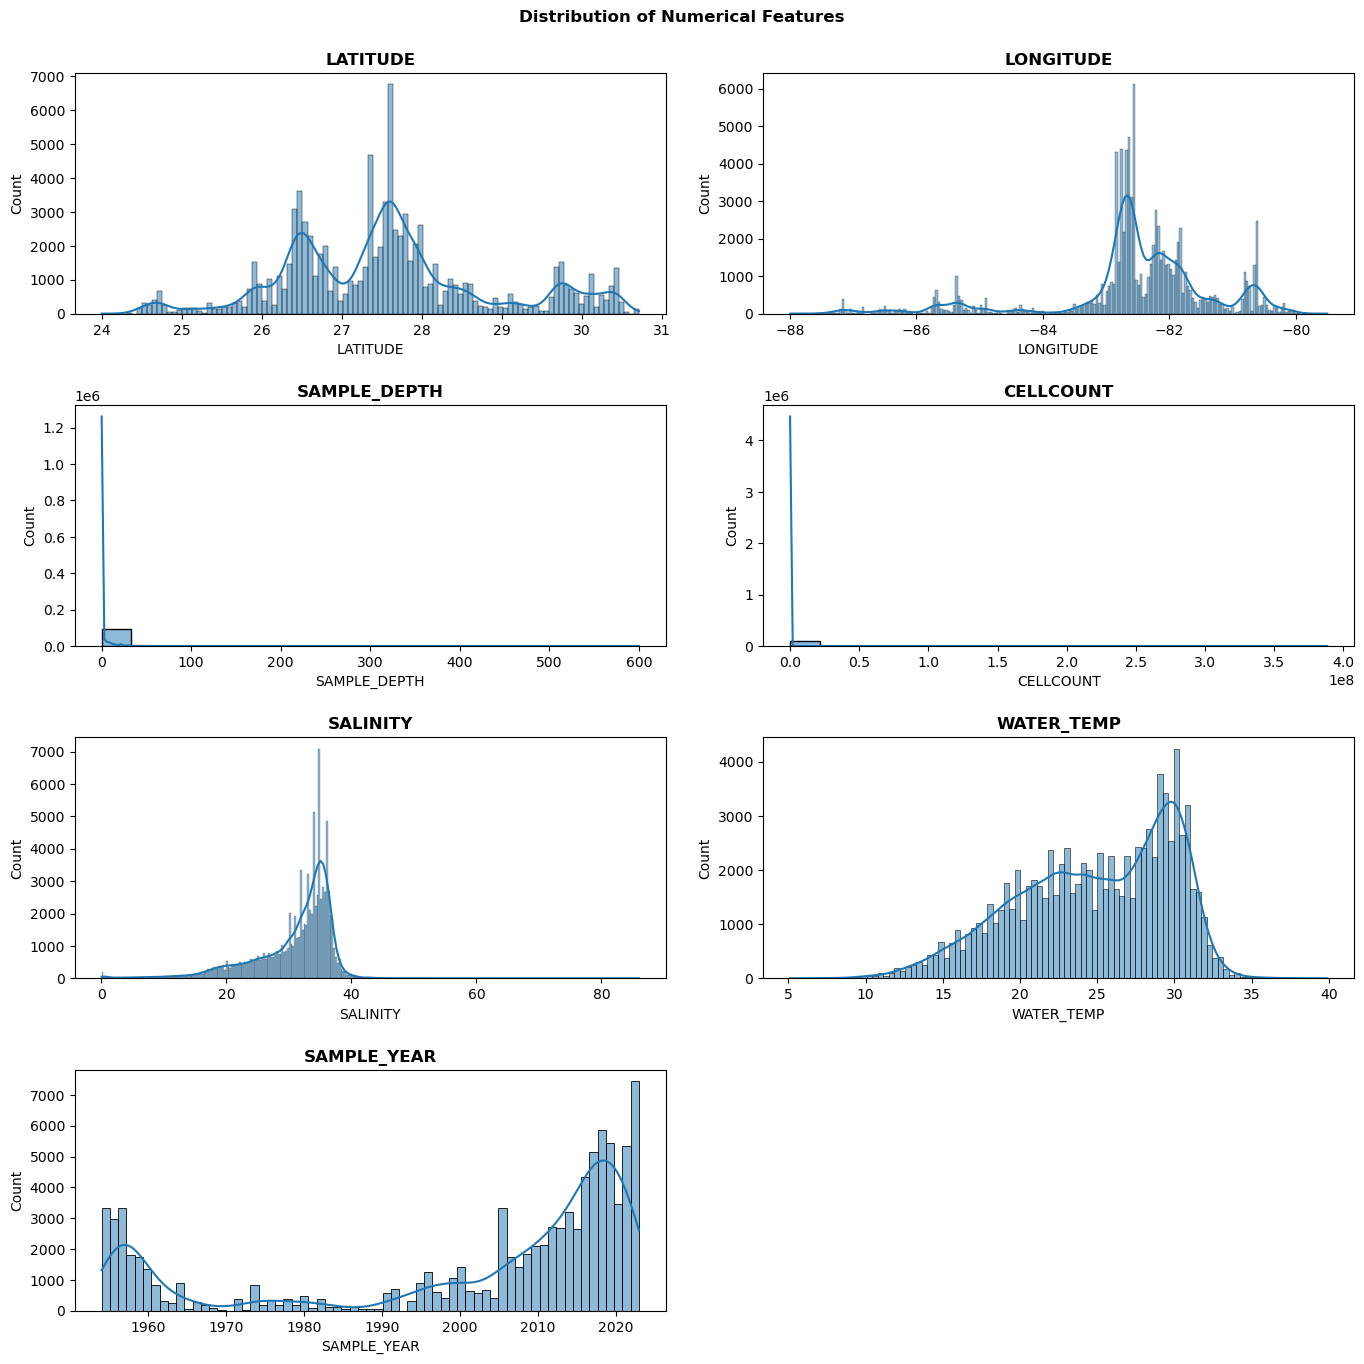

In [111]:
plt.figure(figsize=(14,14))
plt.suptitle("Distribution of Numerical Features", fontweight='bold')

for i, col in enumerate(numerical_df.drop("SAMPLE_MONTH_NUMBER", axis=1)):
    plt.subplot(4,2, i+1)
    sns.histplot(numerical_df[col], kde=True)
    plt.title(f"{col}", fontweight='bold')
    plt.tight_layout(pad=2)

### Checking the skewness of each feature

In [112]:
def check_skewness(df, col):
    skewness= df[col].skew()
    print(f"Skewness of {col} : {skewness}")

In [113]:
check_skewness(numerical_df, num_cols)

Skewness of Index(['LATITUDE', 'LONGITUDE', 'SAMPLE_DEPTH', 'CELLCOUNT', 'SALINITY',
       'WATER_TEMP', 'SAMPLE_MONTH_NUMBER', 'SAMPLE_YEAR'],
      dtype='object') : LATITUDE                 0.402587
LONGITUDE               -1.301157
SAMPLE_DEPTH            25.228798
CELLCOUNT              148.082252
SALINITY                -1.647190
WATER_TEMP              -0.484286
SAMPLE_MONTH_NUMBER     -0.112242
SAMPLE_YEAR             -1.077931
dtype: float64


Interpretation of skewness results

- LATITUDE(0.402587): The positive skewness indicates that most latitude values are concentrated toward the lower end, with a few higher values extending the tail to the right. This suggests that there may be a larger number of samples at lower latitudes with fewer samples at higher latitudes.

- LONGITUDE(-1.301157): The negative skewness suggests that most longitude values are concentrated on the higher end, with a tail extending to the left. This means there are more values at the eastern longitudes, with some western longitudes pulling the average down.

- SAMPLE_DEPTH(25.228798): A positive skewness indicates that most sample depths are relatively shallow, with some deeper samples extending the tail to the right. This could imply that the majority of data is collected from shallow areas, while deeper areas are less frequently sampled.

- CELLCOUNT(148.082252): The positive skewness suggests that the majority of cell count values are lower, with a few higher counts extending the tail to the right. This might indicate that most samples have low to moderate cell counts, while a few samples have significantly higher counts.

- SALINITY(-1.647190): The negative skewness indicates that most salinity values are on the higher end, with some lower values extending the tail to the left. This suggests that there might be a prevalence of higher salinity readings, with fewer instances of very low salinity.

- WATER_TEMP(-0.484286): The negative skewness suggests that water temperature values are concentrated toward the higher end, with a tail extending to the left. This means that most water temperatures are higher, with a few lower temperatures creating the left tail.

- SAMPLE_YEAR(-1.077931): The distribution is left-skewed, with a longer tail on the left side. This suggests that the majority of the sample years are concentrated towards the more recent or higher end, while there are fewer older years pulling the average down.

### Univariate analysis of categorical variables. count plots of each feature with labels, pie charts if necessary

In [114]:
categorical_df.describe(include='object').T

count unique                           top   freq
STATE_ID           92043      1                            FL  92043
DESCRIPTION        92043   8752  New Pass Dock (Sarasota Bay)   1400
SAMPLE_TIME        92043   1324                      00:00:00   4705
GENUS              92043      1                       Karenia  92043
SPECIES            92043      1                        brevis  92043
CATEGORY           92043      5                  not observed  75046
SAMPLE_MONTH_NAME  92043     12                           Oct   9065

Key Insights
- Only one type of Genus(Karenia) and one type of species(brevis)
- There re 4 different states in consideration. Florida, Texas, Alabama and Missisipi
- 5 different types of cellcount categories (not observed, very low, low, medium, high)
- 8752 unique locations

In [177]:
new_data[new_data["CATEGORY"]== "high"].describe().T

count                           mean  \
LATITUDE             971.0                      27.281824   
LONGITUDE            971.0                     -82.485394   
SAMPLE_DATE            971  2004-10-06 19:07:50.854788992   
SAMPLE_DEPTH         971.0                       0.888774   
CELLCOUNT            971.0                 5319246.700309   
SALINITY             971.0                      33.114441   
WATER_TEMP           971.0                      26.050118   
SAMPLE_MONTH_NUMBER  971.0                        7.92173   
SAMPLE_YEAR          971.0                     2004.15036   

                                     min                  25%  \
LATITUDE                         24.6767              26.5535   
LONGITUDE                       -87.1419           -82.686185   
SAMPLE_DATE          1954-11-26 00:00:00  1995-06-08 00:00:00   
SAMPLE_DEPTH                         0.0                  0.5   
CELLCOUNT                      1000000.0            1345159.5   
SALINITY                            10.0                 32.0   
WATER_TEMP                          14.0               22.605   
SAMPLE_MONTH_NUMBER                  1.0                  6.0   
SAMPLE_YEAR                       1954.0               1995.0   

                                     50%                  75%  \
LATITUDE                         27.3309             27.72175   
LONGITUDE                        -82.514            -82.11885   
SAMPLE_DATE          2013-02-28 00:00:00  2018-11-16 12:00:00   
SAMPLE_DEPTH                         0.5                  0.5   
CELLCOUNT                      2000000.0            4024890.5   
SALINITY                            34.0                 35.0   
WATER_TEMP                          26.7               29.395   
SAMPLE_MONTH_NUMBER                  9.0                 11.0   
SAMPLE_YEAR                       2013.0               2018.0   

                                     max            std  
LATITUDE                        30.42758       0.952527  
LONGITUDE                       -80.0327       0.889818  
SAMPLE_DATE          2023-03-29 00:00:00            NaN  
SAMPLE_DEPTH                        20.0       2.128469  
CELLCOUNT                    388400000.0  15432298.4827  
SALINITY                           39.17       2.977446  
WATER_TEMP                          35.0       3.945512  
SAMPLE_MONTH_NUMBER                 12.0       3.389805  
SAMPLE_YEAR                       2023.0      19.595025

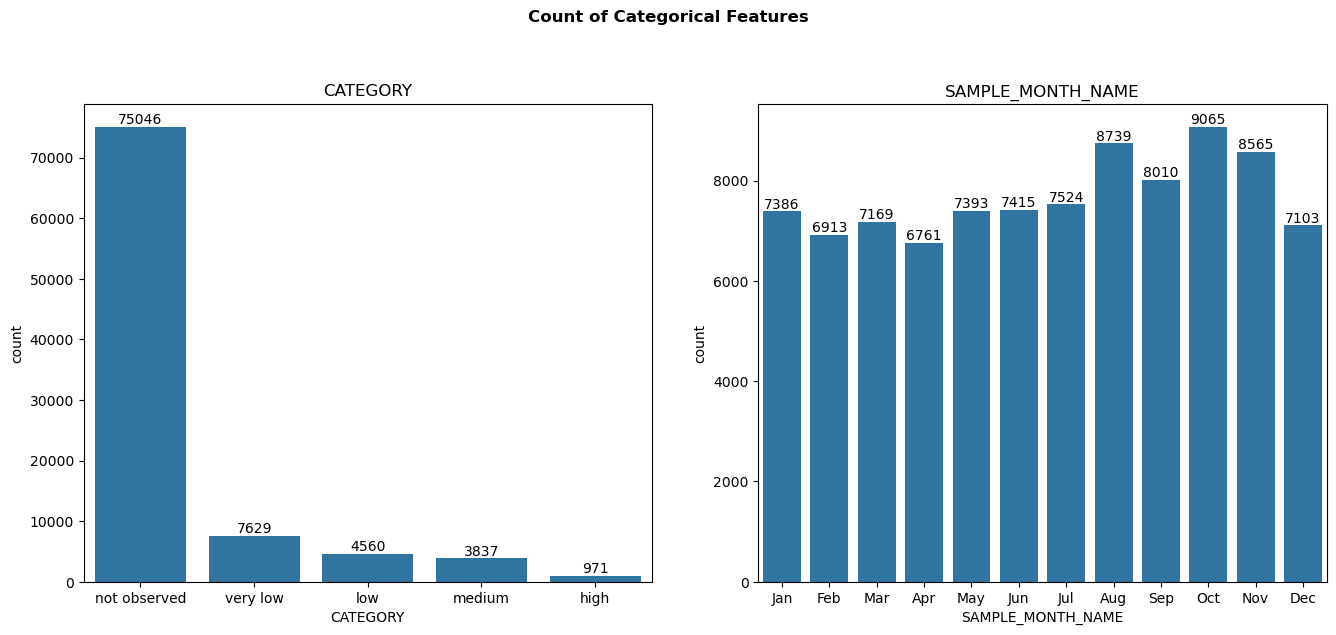

In [165]:
plt.figure(figsize=(14,12))
plt.suptitle("Count of Categorical Features", fontweight='bold')

for i, col in enumerate(categorical_df.drop(["SAMPLE_DATE", "SAMPLE_TIME", "DESCRIPTION", "SPECIES", "GENUS", "STATE_ID"], axis=1)):
    plt.subplot(2,2, i+1)
    ax= sns.countplot(x=categorical_df[col])
    ax.bar_label(ax.containers[0])
    plt.title(f"{col}")
    plt.tight_layout(pad=3)
    

### Bivariate analysis of numerical varibles, scatter plots, correlation heatmaps

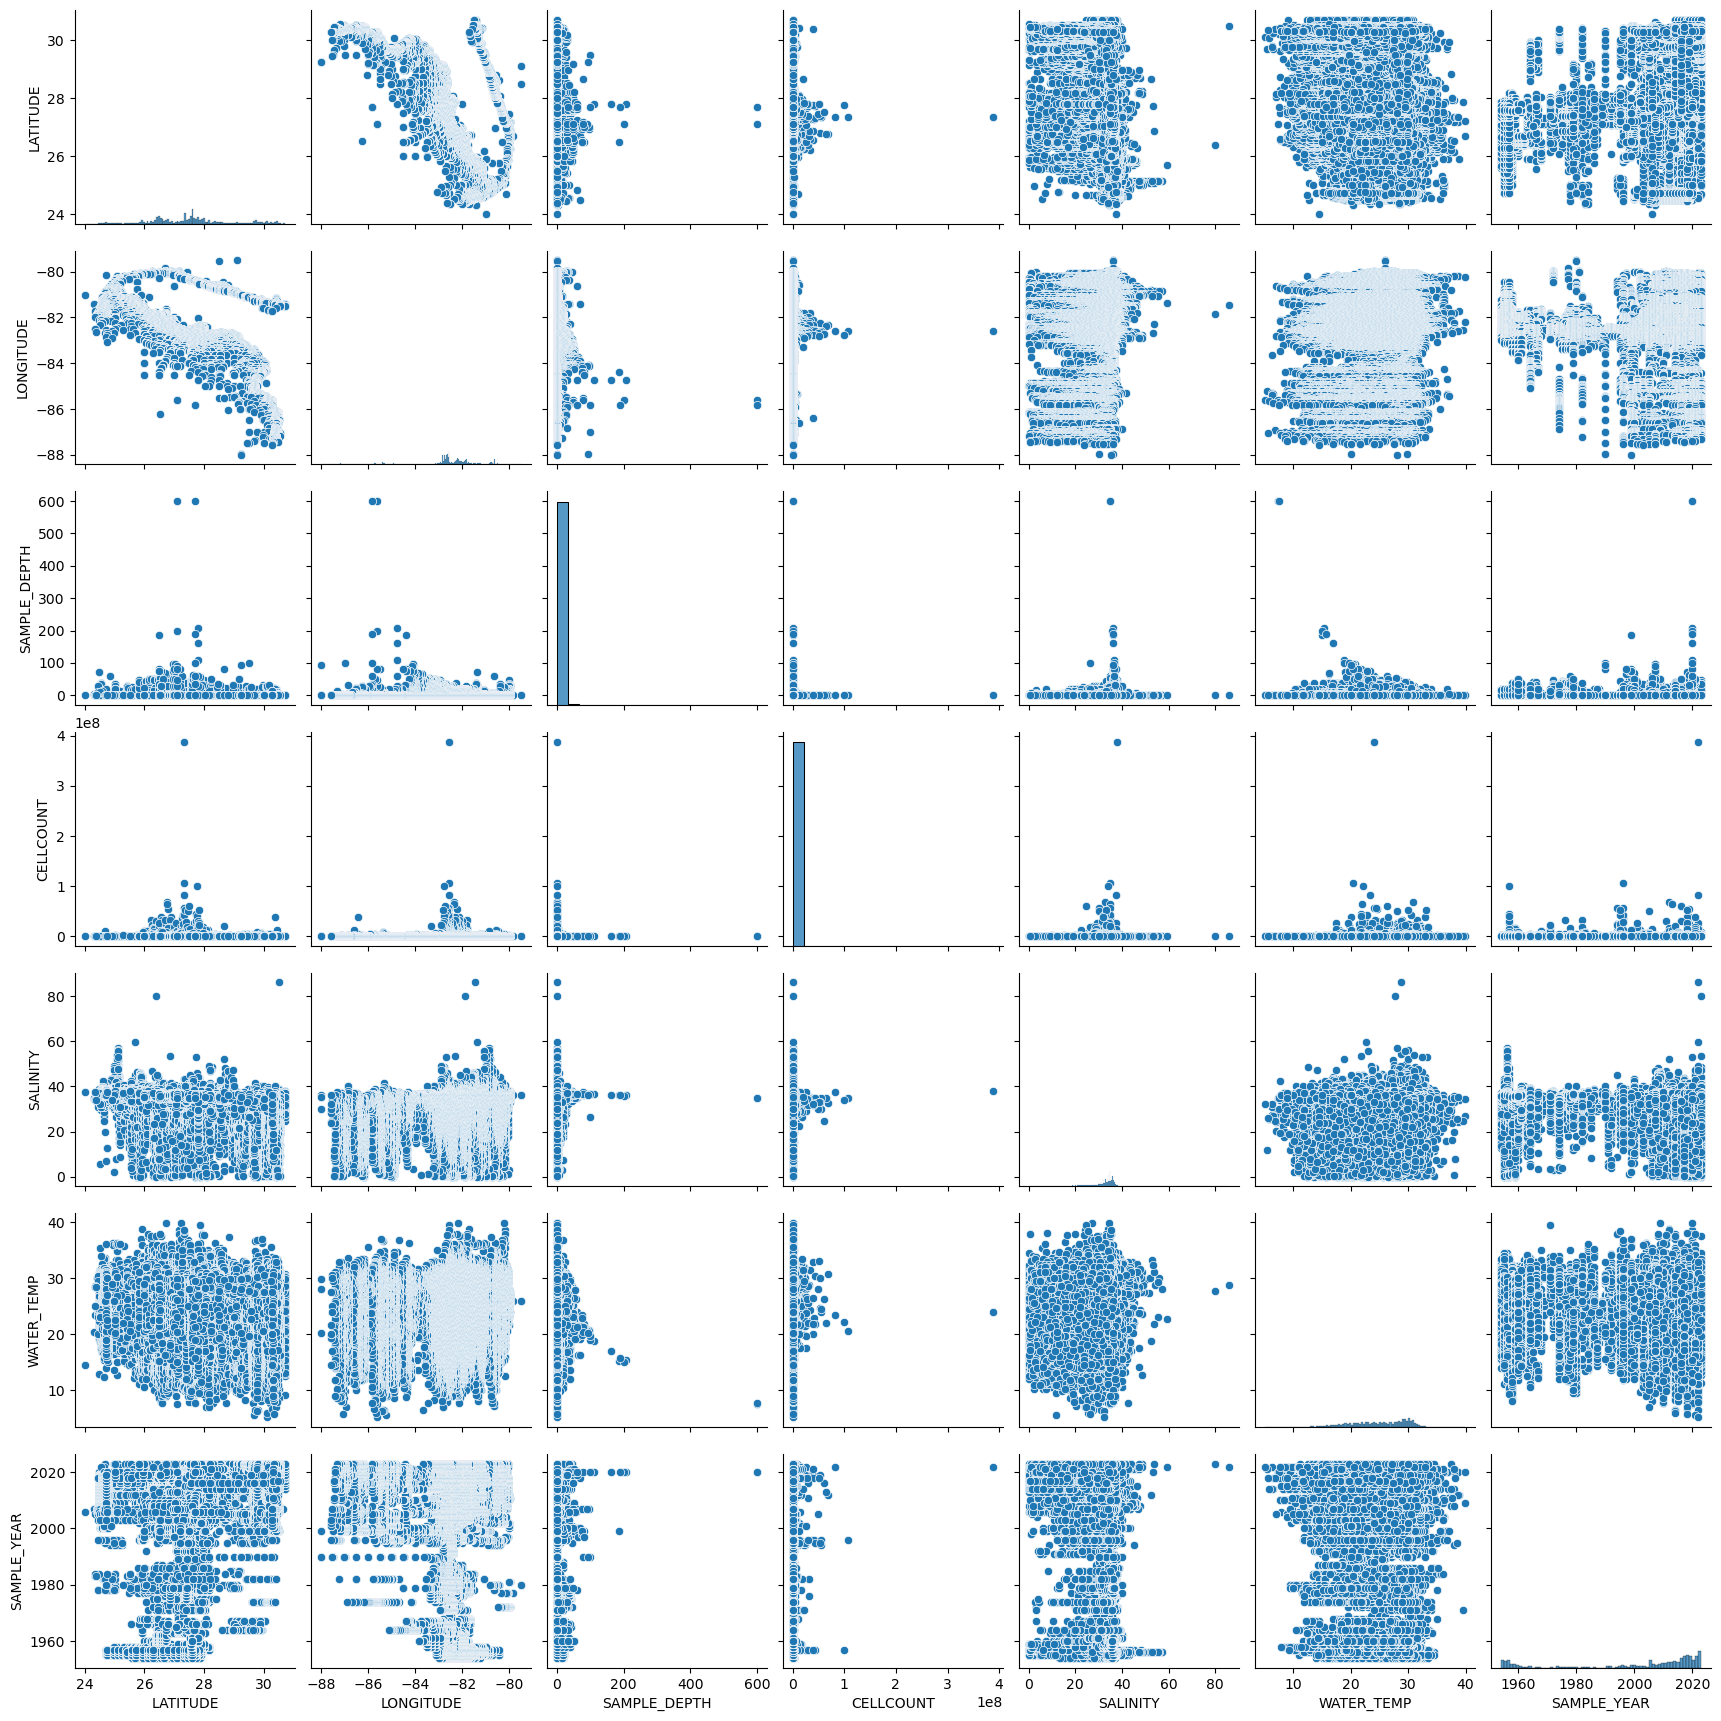

In [116]:
#Pairplot of numerical features

sns.pairplot(numerical_df.drop("SAMPLE_MONTH_NUMBER", axis=1))

Text(0.5, 1.0, 'LONGITUDE vs LATITUDE')

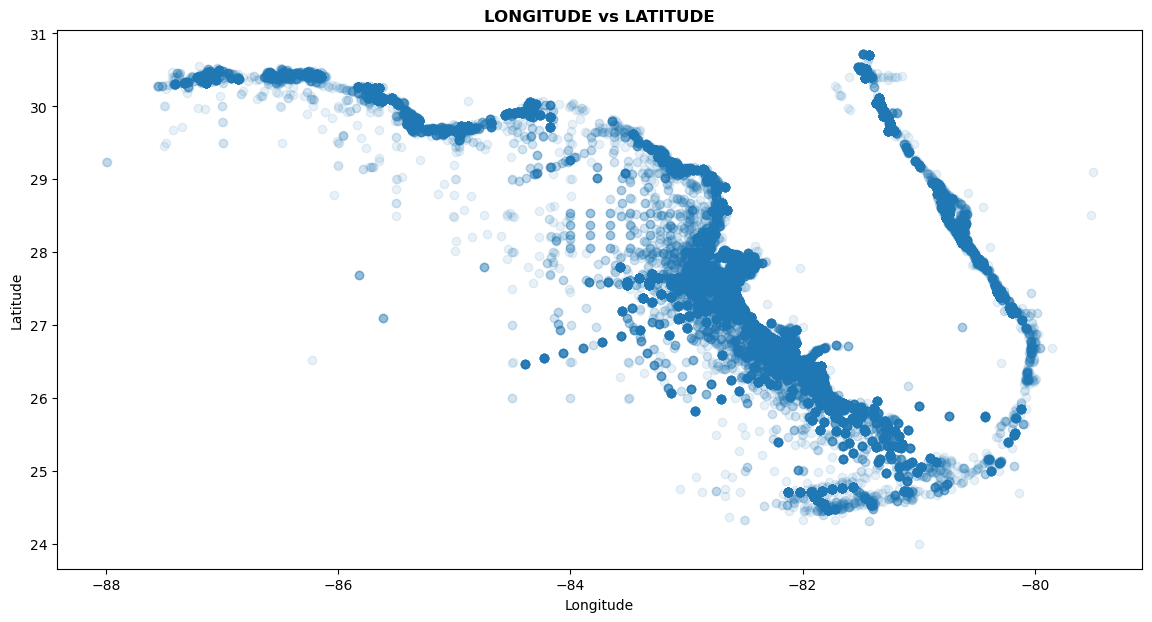

In [117]:
#Longitude vs Latitude

plt.figure(figsize= (14,7))
plt.scatter(x= numerical_df["LONGITUDE"], y=numerical_df["LATITUDE"], alpha=0.1)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("LONGITUDE vs LATITUDE", fontweight='bold')

Most of the data was collected along the coast of Florida

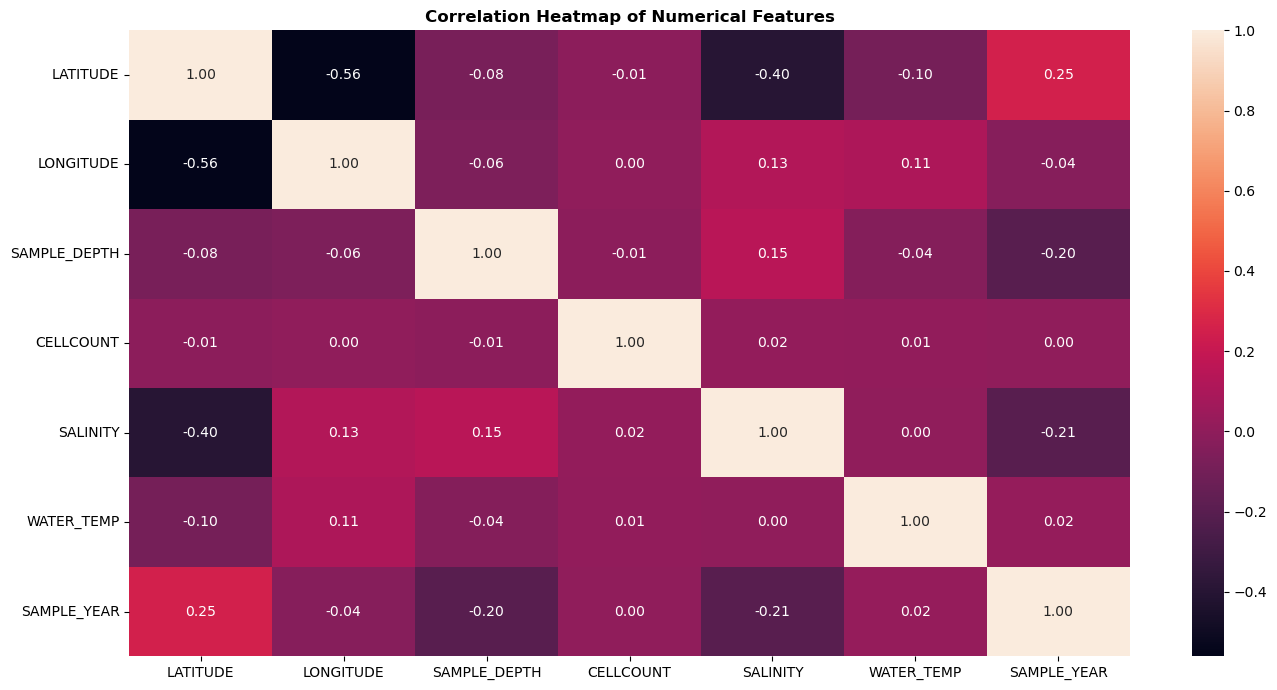

In [118]:
#Correlation Heatmap of Numerical Features

plt.figure(figsize=(14,7))
sns.heatmap(numerical_df.drop("SAMPLE_MONTH_NUMBER", axis=1).corr(), annot=True, fmt='.2f')
plt.title("Correlation Heatmap of Numerical Features", fontweight='bold')
plt.tight_layout()

### Bivariate Analysis of categorical variables, count plots with hues

/var/folders/45/d0jt1g0523n27wc_qzf0j05c0000gn/T/ipykernel_1555/2060093463.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df["SAMPLE_MONTH_NAME"] = pd.Categorical(


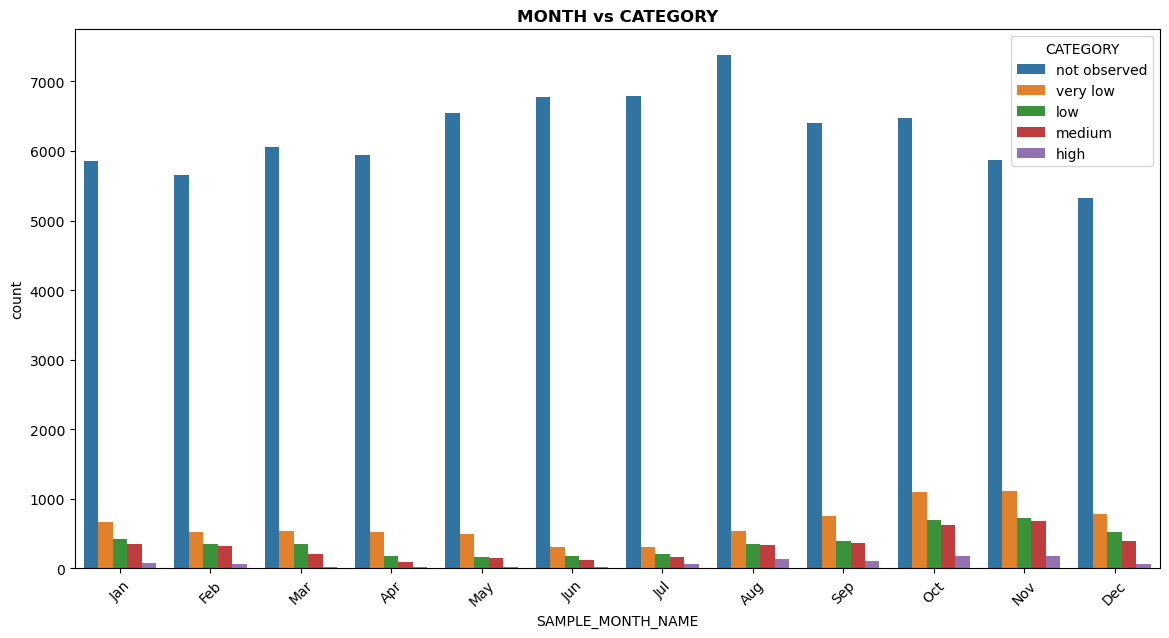

In [164]:
month_order = [
    "Jan", "Feb", "Mar", "Apr", "May", "Jun",
    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"
]

# Convert SAMPLE_MONTH_NAME to a categorical type with the specified order
categorical_df["SAMPLE_MONTH_NAME"] = pd.Categorical(
    categorical_df["SAMPLE_MONTH_NAME"],
    categories=month_order,
    ordered=True
)

# Plot the data
plt.figure(figsize=(14, 7))
sns.countplot(x=categorical_df["SAMPLE_MONTH_NAME"], hue=categorical_df["CATEGORY"])
plt.title("MONTH vs CATEGORY", fontweight='bold')
plt.xticks(rotation=45)  # Optional: Rotate x-axis labels for better readability
plt.show()



#Month vs Category
#plt.figure(figsize=(14,7))
#sns.countplot(x= categorical_df["SAMPLE_MONTH_NAME"], hue=categorical_df["CATEGORY"])
#plt.title("MONTH vs CATEGORY", fontweight='bold')

### Multivariate analysis

Text(0.5, 1.0, 'LONGITUDE vs LATITUDE  & CATEGORY')

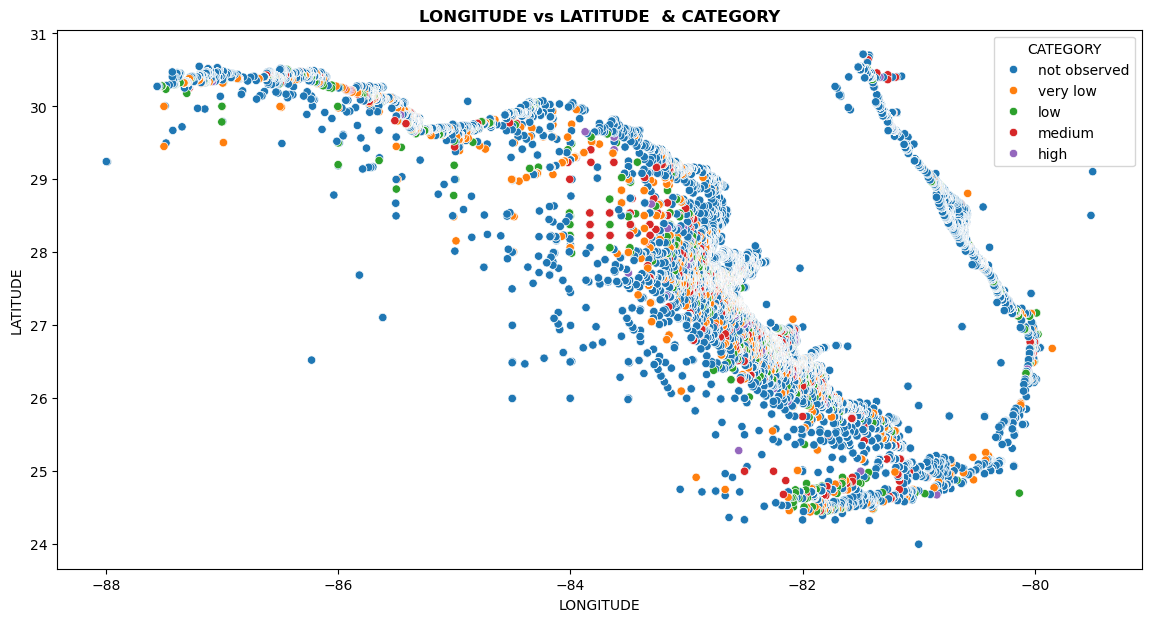

In [120]:
#Scatter plot of Longitude vs latitude and category

plt.figure(figsize=(14,7))
sns.scatterplot(x=numerical_df["LONGITUDE"], y=numerical_df["LATITUDE"], hue= categorical_df["CATEGORY"])
plt.title("LONGITUDE vs LATITUDE  & CATEGORY", fontweight='bold')

Text(0.5, 1.0, 'SALINITY vs WATER TEMP & CATEGORY')

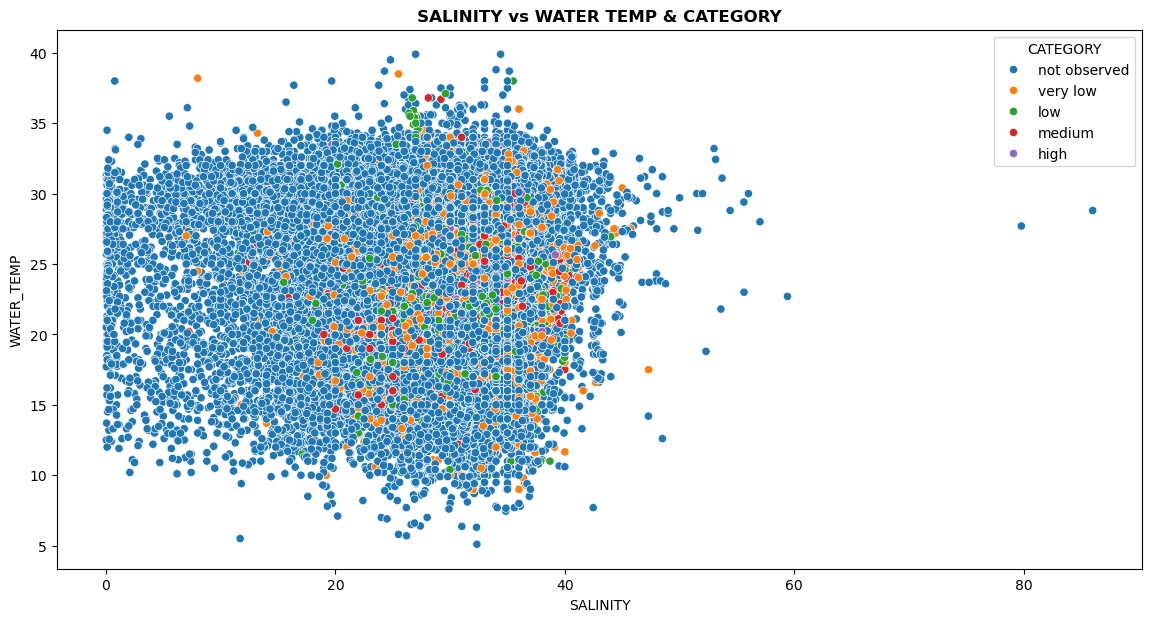

In [121]:
#Scatter plot of Salinity vs Water Temp and Cellcount

plt.figure(figsize=(14,7))
sns.scatterplot(x=numerical_df["SALINITY"], y=numerical_df["WATER_TEMP"], hue=categorical_df["CATEGORY"])
plt.title("SALINITY vs WATER TEMP & CATEGORY", fontweight='bold')

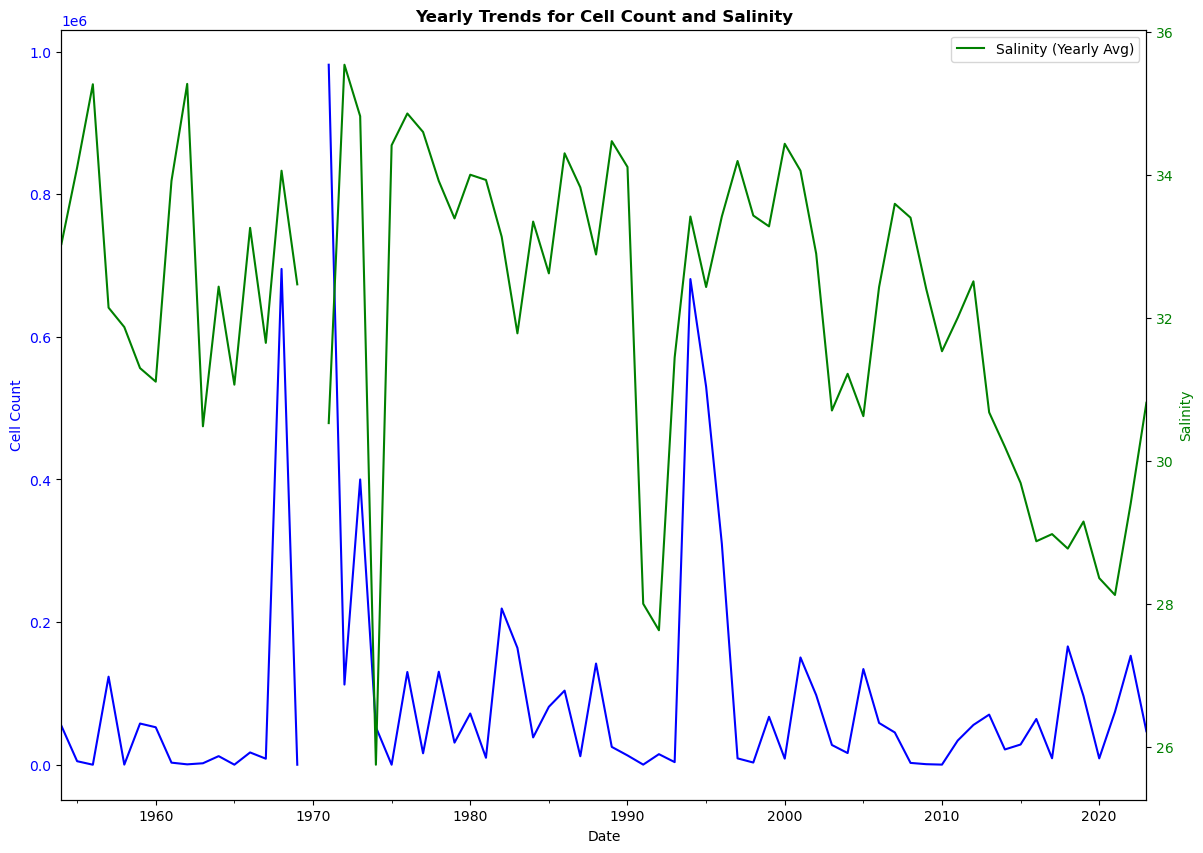

In [122]:
new_data1= new_data.copy(deep=True)
new_data1.set_index("SAMPLE_DATE", inplace=True)
plt.figure(figsize=(14, 10))

# Plot CELLCOUNT with the primary y-axis
ax1 = new_data1['CELLCOUNT'].resample('YE').mean().plot(label='Cell Count (Yearly Avg)', color='blue')
ax1.set_ylabel('Cell Count', color='blue')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for SALINITY
ax2 = ax1.twinx()
new_data1['SALINITY'].resample('YE').mean().plot(ax=ax2, label='Salinity (Yearly Avg)', color='green')
ax2.set_ylabel('Salinity', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Yearly Trends for Cell Count and Salinity', fontweight='bold')
plt.legend()
plt.show()

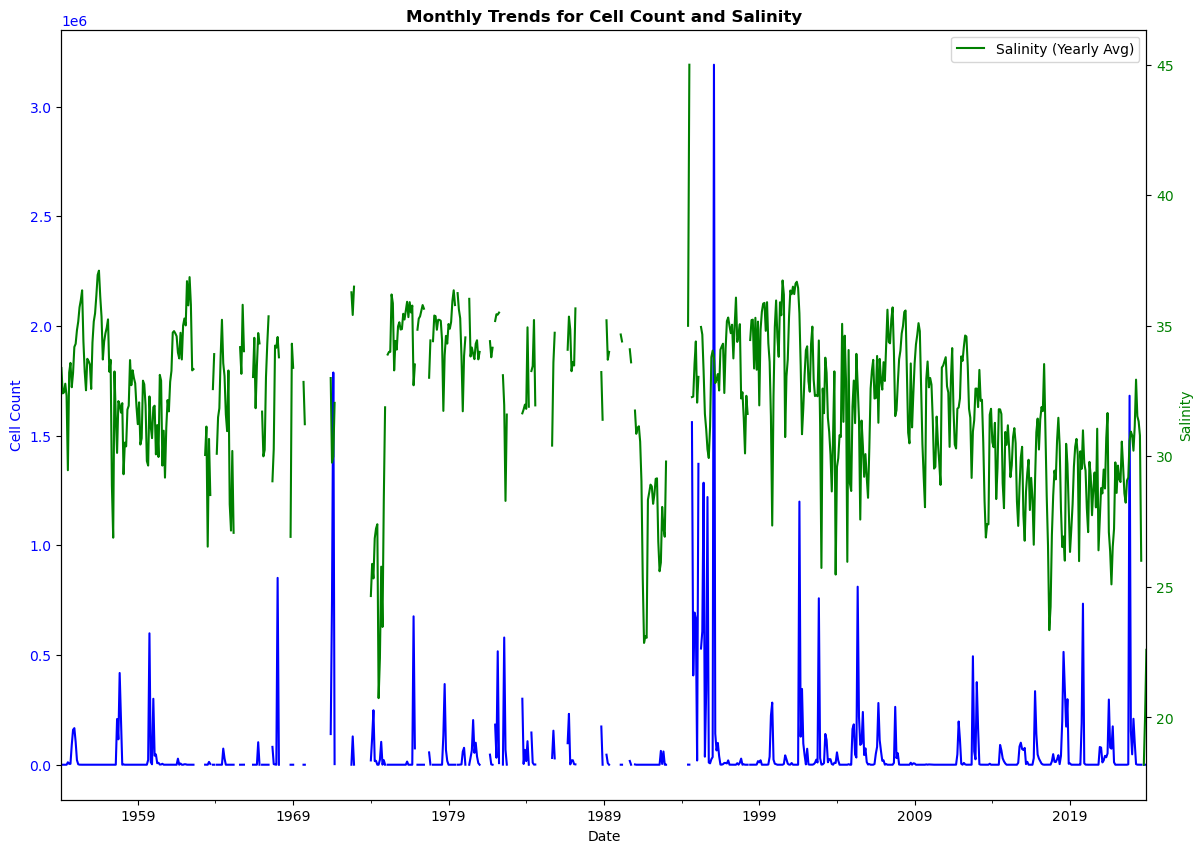

In [123]:
plt.figure(figsize=(14, 10))

ax1 = new_data1['CELLCOUNT'].resample('ME').mean().plot(label='Cell Count (Yearly Avg)', color='blue')
ax1.set_ylabel('Cell Count', color='blue')
ax1.set_xlabel('Date')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis for SALINITY
ax2 = ax1.twinx()
new_data1['SALINITY'].resample('ME').mean().plot(ax=ax2, label='Salinity (Yearly Avg)', color='green')
ax2.set_ylabel('Salinity', color='green')
ax2.tick_params(axis='y', labelcolor='green')

plt.title('Monthly Trends for Cell Count and Salinity', fontweight='bold')
plt.legend()
plt.show()

### Feature Engineering

In [124]:
#Dropping irrelevant columns

new_data2= new_data.drop(["STATE_ID", "DESCRIPTION", "SAMPLE_TIME", "SAMPLE_DATE", "SAMPLE_MONTH_NAME", "SAMPLE_MONTH_NUMBER", "SAMPLE_YEAR", "SPECIES","GENUS"], axis=1)
new_data2

LATITUDE  LONGITUDE  SAMPLE_DEPTH      CATEGORY  CELLCOUNT  SALINITY  \
0       29.1058   -79.5015           0.5  not observed          0    36.000   
1       28.5062   -79.5165           0.5  not observed          0    36.000   
2       26.6833   -79.8500           0.5      very low       2000    36.000   
3       26.6937   -79.9542          27.4  not observed          0    36.000   
4       26.6937   -79.9542           0.5  not observed          0    34.000   
...         ...        ...           ...           ...        ...       ...   
92571   30.2771   -87.5556           0.5  not observed          0    32.000   
92572   30.2734   -87.5589           0.5  not observed          0    23.590   
92573   29.2390   -87.9880           0.5      very low       9000    30.074   
92574   29.2390   -87.9880          94.0  not observed          0    36.333   
92575   29.2443   -87.9962           0.5  not observed          0    35.260   

       WATER_TEMP  
0           26.00  
1           26.00  
2           26.00  
3           27.50  
4           27.00  
...           ...  
92571       27.50  
92572       14.54  
92573       29.83  
92574       20.13  
92575       28.15  

[92043 rows x 7 columns]

In [125]:
#Encoding categorical variable "Category"

le= LabelEncoder()
new_data2["CATEGORY"]= le.fit_transform(new_data2["CATEGORY"])

#Standarding numerical features
scaler= StandardScaler()
new_data2[["LATITUDE","LONGITUDE","SAMPLE_DEPTH","CELLCOUNT","SALINITY", "WATER_TEMP"]]= scaler.fit_transform(new_data2[["LATITUDE","LONGITUDE","SAMPLE_DEPTH","CELLCOUNT","SALINITY", "WATER_TEMP"]])

### Model Development

### Visualizing Univariate Outliers using Box Plots

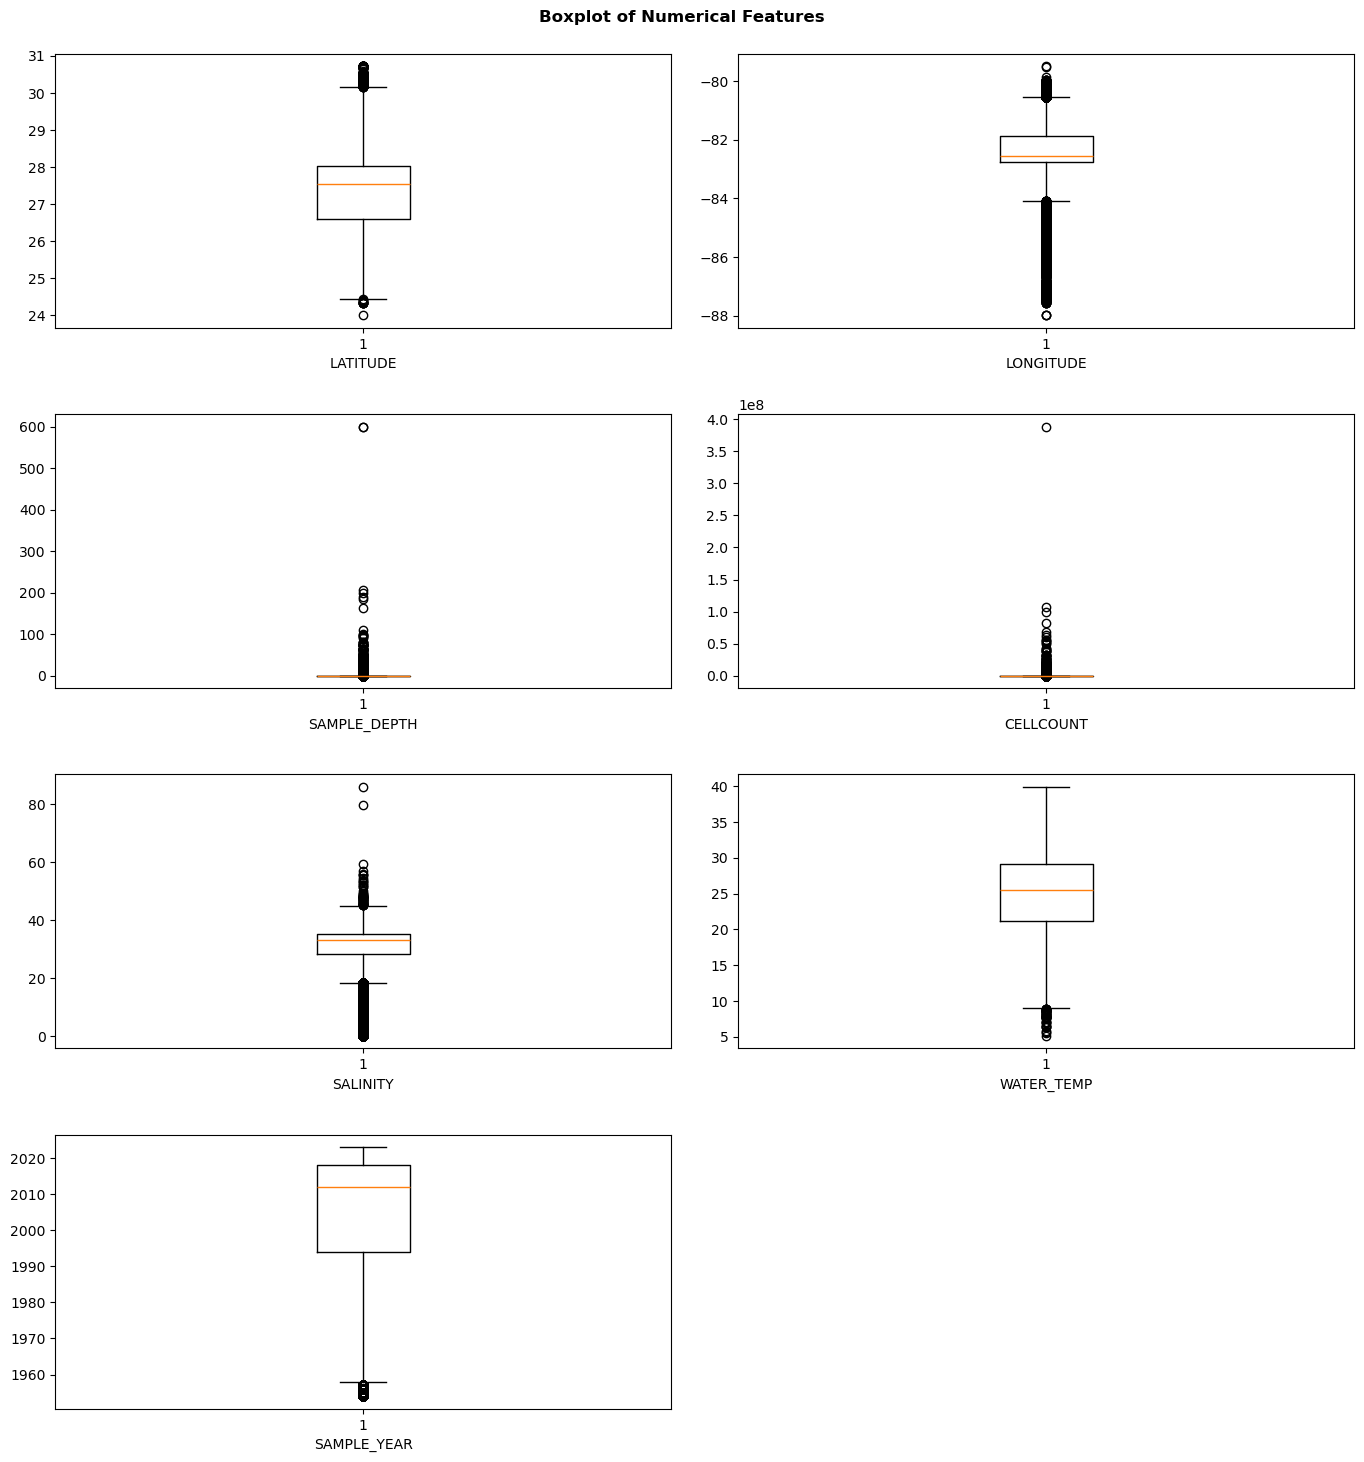

In [126]:
plt.figure(figsize=(14,15))
plt.suptitle("Boxplot of Numerical Features", fontweight='bold')

for i, col in enumerate(numerical_df.drop("SAMPLE_MONTH_NUMBER", axis=1)):
    plt.subplot(4, 2, i+1)
    plt.boxplot(x=numerical_df[col])
    plt.xlabel(f"{col}")
    plt.tight_layout(pad=2)

### Isolation Forest

In [127]:
isolation_data= new_data.copy(deep=True)

In [128]:
model_IF= IsolationForest(contamination=0.01, random_state=42)
model_IF.fit(new_data2)
isolation_data["Anomaly_Scores"]= model_IF.decision_function(new_data2)
isolation_data["Anomaly"]= model_IF.predict(new_data2)

In [129]:
def outlier_plot(data, outlier_method_name, x_var, y_var):
    
    print(f'Outlier Method: {outlier_method_name}')
    
    method = f'{outlier_method_name}_anomaly'
    
    print(f"Number of anomalous values {len(data[data['Anomaly']==-1])}")
    print(f"Number of non anomalous values  {len(data[data['Anomaly']== 1])}")
    print(f'Total Number of Values: {len(data)}')

In [130]:
outlier_plot(isolation_data, 'Isolation Forest', new_data2["LONGITUDE"], new_data2["LATITUDE"])

Outlier Method: Isolation Forest
Number of anomalous values 921
Number of non anomalous values  91122
Total Number of Values: 92043


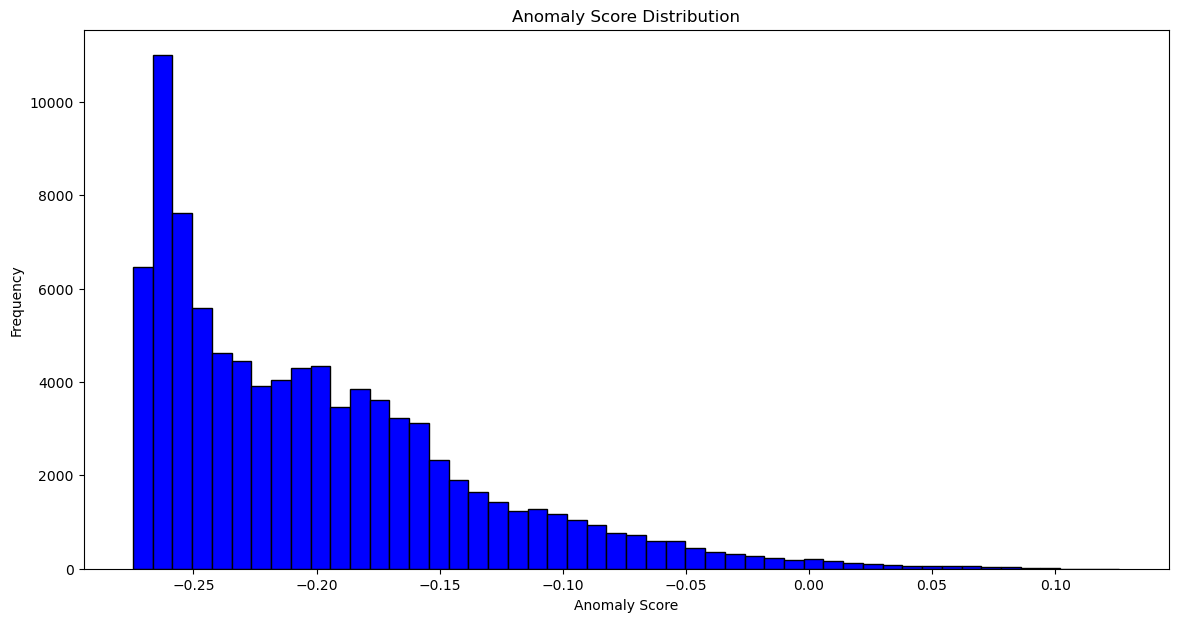

In [131]:
# Assuming 'scores' contains the anomaly scores from the Isolation Forest
plt.figure(figsize=(14,7))
plt.hist(- isolation_data["Anomaly_Scores"], bins=50, color='blue', edgecolor='black')
plt.title("Anomaly Score Distribution")
plt.xlabel("Anomaly Score")
plt.ylabel("Frequency")
plt.show()

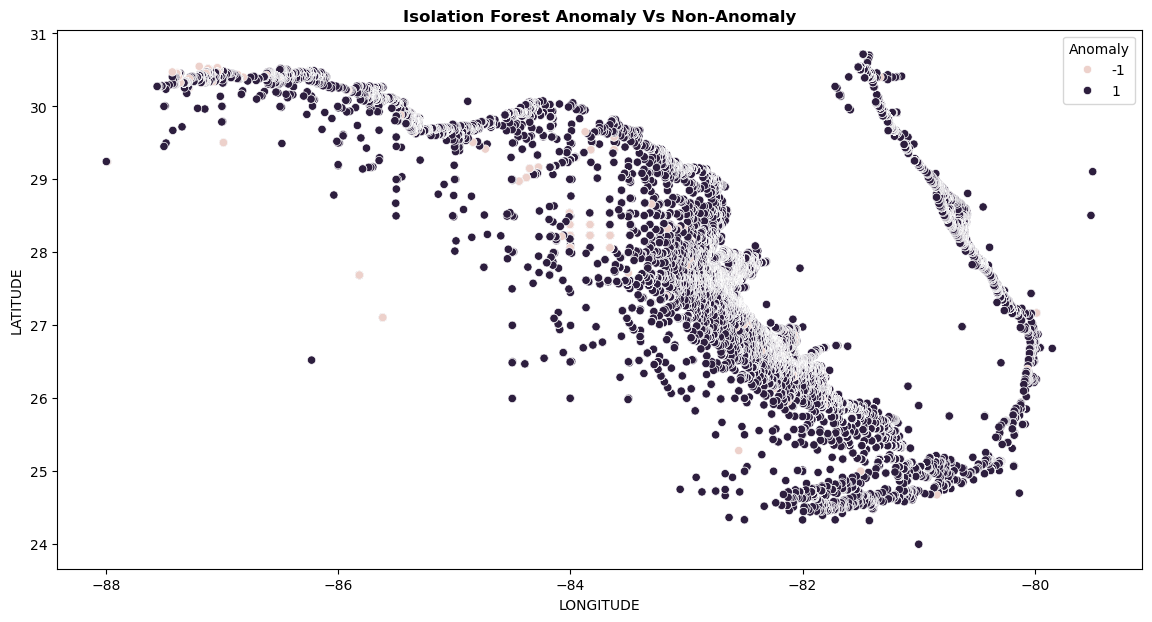

In [132]:
#Scatter plot of Longitude vs latitude and category

plt.figure(figsize=(14,7))
sns.scatterplot(x=numerical_df["LONGITUDE"], y=numerical_df["LATITUDE"], hue= isolation_data["Anomaly"])
plt.title("Isolation Forest Anomaly Vs Non-Anomaly", fontweight='bold')
plt.show()

In [133]:
#Grouping the Isolation Forest Anomaly Data

isolation_anomaly= isolation_data[isolation_data["Anomaly"]== -1]
isolation_anomaly

STATE_ID                                    DESCRIPTION  LATITUDE  \
9           FL  St. Lucie Inlet; 9 mi East of 0.625 mi. point  27.16930   
76          FL         Palm Beach and Sloan''s Curve; between  26.69180   
104         FL               Palm Beach; Wreck at Gulf Stream  26.56000   
158         FL                     Highland Beach; 50 yd East  26.39900   
855         FL                             Walton Rocks Beach  27.33810   
...        ...                                            ...       ...   
92509       FL          Chambers Point; S of (Peridido River)  30.45171   
92510       FL          Perdido River; mouth of (Perdido Bay)  30.45171   
92554       FL                       Peridido River; upstream  30.47178   
92569       FL                        Alabama Pass; East side  30.27600   
92574       FL                        Northern Gulf of Mexico  29.23900   

       LONGITUDE SAMPLE_DATE SAMPLE_TIME  SAMPLE_DEPTH    GENUS SPECIES  \
9      -79.98500  1972-11-16    11:05:00          30.5  Karenia  brevis   
76     -80.03270  1972-11-11    15:00:00           0.5  Karenia  brevis   
104    -80.04000  1972-11-12    14:00:00           0.5  Karenia  brevis   
158    -80.06450  1972-11-12    16:00:00           0.5  Karenia  brevis   
855    -80.23280  2002-11-26    12:20:00           0.5  Karenia  brevis   
...          ...         ...         ...           ...      ...     ...   
92509  -87.38930  2017-01-18    17:15:00           0.3  Karenia  brevis   
92510  -87.38930  2017-04-13    15:55:00           0.3  Karenia  brevis   
92554  -87.42803  2017-01-18    16:55:00           0.3  Karenia  brevis   
92569  -87.55470  1996-10-21    12:25:00           0.5  Karenia  brevis   
92574  -87.98800  1990-09-06    21:57:00          94.0  Karenia  brevis   

           CATEGORY  CELLCOUNT  SALINITY  WATER_TEMP SAMPLE_MONTH_NAME  \
9               low      16500    35.500       25.50               Nov   
76             high    1700000    36.500       27.00               Nov   
104            high    1380000    38.000       27.00               Nov   
158            high    1553000    37.000       27.00               Nov   
855            high    3570000    36.000       23.30               Nov   
...             ...        ...       ...         ...               ...   
92509  not observed          0     0.500       17.90               Jan   
92510  not observed          0     2.900       22.10               Apr   
92554  not observed          0     0.400       17.10               Jan   
92569           low      66700    24.000       21.66               Oct   
92574  not observed          0    36.333       20.13               Sep   

       SAMPLE_MONTH_NUMBER  SAMPLE_YEAR  Anomaly_Scores  Anomaly  
9                       11         1972       -0.000284       -1  
76                      11         1972       -0.025814       -1  
104                     11         1972       -0.021628       -1  
158                     11         1972       -0.019156       -1  
855                     11         2002       -0.038870       -1  
...                    ...          ...             ...      ...  
92509                    1         2017       -0.029234       -1  
92510                    4         2017       -0.013023       -1  
92554                    1         2017       -0.032169       -1  
92569                   10         1996       -0.005267       -1  
92574                    9         1990       -0.035437       -1  

[921 rows x 18 columns]

In [134]:
#Desriptive statistics of anomalies
isolation_anomaly.describe().T

count                           mean  \
LATITUDE             921.0                      27.891962   
LONGITUDE            921.0                     -83.233018   
SAMPLE_DATE            921  2005-05-06 18:12:53.941368064   
SAMPLE_DEPTH         921.0                       3.808795   
CELLCOUNT            921.0                 5269266.611292   
SALINITY             921.0                       29.76675   
WATER_TEMP           921.0                      24.944272   
SAMPLE_MONTH_NUMBER  921.0                        7.81759   
SAMPLE_YEAR          921.0                    2004.740499   
Anomaly_Scores       921.0                      -0.031849   
Anomaly              921.0                           -1.0   

                                     min                  25%  \
LATITUDE                          24.455              26.6798   
LONGITUDE                        -87.988            -83.25683   
SAMPLE_DATE          1954-12-08 00:00:00  1996-02-27 00:00:00   
SAMPLE_DEPTH                         0.0                  0.5   
CELLCOUNT                            0.0            1130000.0   
SALINITY                            0.04                29.83   
WATER_TEMP                          7.45                 21.5   
SAMPLE_MONTH_NUMBER                  1.0                  6.0   
SAMPLE_YEAR                       1954.0               1996.0   
Anomaly_Scores                 -0.126071            -0.050358   
Anomaly                             -1.0                 -1.0   

                                     50%                  75%  \
LATITUDE                         27.5385               29.025   
LONGITUDE                       -82.5867            -82.15667   
SAMPLE_DATE          2014-08-05 00:00:00  2018-11-14 00:00:00   
SAMPLE_DEPTH                         0.5                  0.5   
CELLCOUNT                      2056320.0            4176000.0   
SALINITY                           33.08                 34.9   
WATER_TEMP                         26.28                29.39   
SAMPLE_MONTH_NUMBER                  9.0                 10.0   
SAMPLE_YEAR                       2014.0               2018.0   
Anomaly_Scores                 -0.024977            -0.010758   
Anomaly                             -1.0                 -1.0   

                                     max              std  
LATITUDE                        30.54876         1.458714  
LONGITUDE                        -79.985         1.801038  
SAMPLE_DATE          2023-07-26 00:00:00              NaN  
SAMPLE_DEPTH                       600.0        28.925333  
CELLCOUNT                    388400000.0  15895246.966706  
SALINITY                           39.17         9.077925  
WATER_TEMP                          37.1         5.530057  
SAMPLE_MONTH_NUMBER                 12.0         3.427408  
SAMPLE_YEAR                       2023.0        19.202892  
Anomaly_Scores                 -0.000005         0.025737  
Anomaly                             -1.0              0.0

In [135]:
isolation_anomaly.describe(include="object").T

count unique                      top freq
STATE_ID            921      1                       FL  921
DESCRIPTION         921    557  Bay Dock (Sarasota Bay)   29
SAMPLE_TIME         921    426                 00:00:00   49
GENUS               921      1                  Karenia  921
SPECIES             921      1                   brevis  921
CATEGORY            921      5                     high  724
SAMPLE_MONTH_NAME   921     12                      Oct  171

### Local Outlier Factor

In [136]:
lof_data= new_data.copy(deep=True)

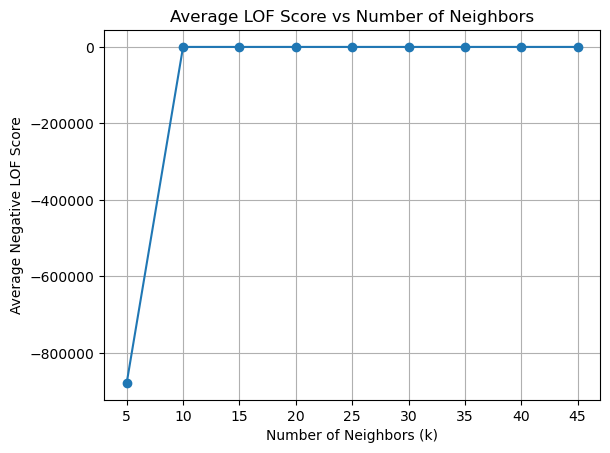

In [137]:
#Determining the optimal number of neigbors

k_values = range(5, 50, 5)  
avg_lof_scores = []

for k in k_values:
    lof = LocalOutlierFactor(n_neighbors=k)
    lof.fit(new_data2)
    avg_lof_scores.append(np.mean(lof.negative_outlier_factor_))

# Plot the results
plt.plot(k_values, avg_lof_scores, marker='o')
plt.title('Average LOF Score vs Number of Neighbors')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Average Negative LOF Score')
plt.grid()
plt.show()

From the plot, we can observe the following key points regarding the relationship between the number of neighbors (k) and the average negative LOF score:
1. Sudden Drop at k=5, the average negative LOF score is drastically low (high negative magnitude), indicating that the algorithm is identifying points as outliers with very high sensitivity due to a very small neighborhood size. This suggests that the algorithm is too sensitive to local density fluctuations at this point.
2. Stabilization After k=10: the average LOF score stabilizes and stays almost constant across the range of k. This means that increasing k further does not significantly impact the density estimation or the relative "outlier-ness" of the points.
3. k=10 seems to be the minimum value after which the LOF score stabilizes. This is likely a good choice for k since it balances local density estimation while avoiding extreme sensitivity to small neighborhoods.

In [138]:
#LOF with neighbors=5

lof = LocalOutlierFactor(n_neighbors=5, contamination=0.01)  # 10% outliers
outlier_scores = lof.fit_predict(new_data2)  # -1 for outliers, 1 for inliers
negative_outlier_factors = lof.negative_outlier_factor_

# Identify outliers
outlier_indices = np.where(outlier_scores == -1)[0]
print(f"Number of outliers detected: {len(outlier_indices)}")

Number of outliers detected: 921


In [139]:
#LOF with neighbors=10

lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)  # 10% outliers
outlier_scores = lof.fit_predict(new_data2)  # -1 for outliers, 1 for inliers
negative_outlier_factors = lof.negative_outlier_factor_

# Identify outliers
outlier_indices = np.where(outlier_scores == -1)[0]
print(f"Number of outliers detected: {len(outlier_indices)}")

Number of outliers detected: 921


In [140]:
#LOF with neighbors=20

lof = LocalOutlierFactor(n_neighbors=20, contamination=0.01)  # 10% outliers
outlier_scores = lof.fit_predict(new_data2)  # -1 for outliers, 1 for inliers
negative_outlier_factors = lof.negative_outlier_factor_

# Identify outliers
outlier_indices = np.where(outlier_scores == -1)[0]
print(f"Number of outliers detected: {len(outlier_indices)}")

Number of outliers detected: 920


In [141]:
#Final LOF with with neighbors=10
lof = LocalOutlierFactor(n_neighbors=10, contamination=0.01)  # 10% outliers
lof_data["Anomaly"] = lof.fit_predict(new_data2)  # -1 for outliers, 1 for inliers
negative_outlier_factors = lof.negative_outlier_factor_
lof_data["LOF"]= negative_outlier_factors.tolist()

# Identify outliers
outlier_indices = np.where(outlier_scores == -1)[0]
print(f"Number of outliers detected: {len(outlier_indices)}")


Number of outliers detected: 920


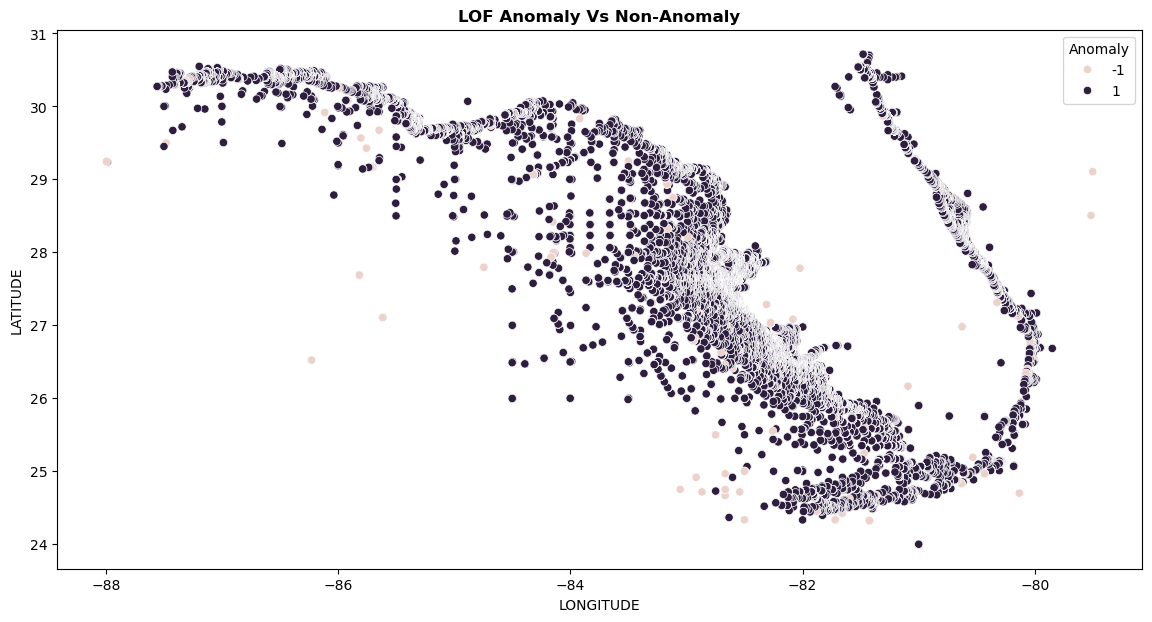

In [142]:
#Scatter plot of Longitude vs latitude and category

plt.figure(figsize=(14,7))
sns.scatterplot(x=numerical_df["LONGITUDE"], y=numerical_df["LATITUDE"], hue= lof_data["Anomaly"])
plt.title("LOF Anomaly Vs Non-Anomaly", fontweight='bold')
plt.show()

In [143]:
lof_anomaly= lof_data[lof_data["Anomaly"]== -1]
lof_anomaly

STATE_ID                                    DESCRIPTION  LATITUDE  \
0           FL                              off Daytona Beach  29.10580   
1           FL                             off Cape Canaveral  28.50620   
29          FL              South Lake Worth Inlet; 2 mi East  26.54510   
43          FL  Palm Beach; 1 mi East of Bath and Tennis Club  26.67510   
62          FL            Palm Beach; 250 yd East of old pier  26.69850   
...        ...                                            ...       ...   
92044       FL                           Pensacola Beach Pier  30.32730   
92420       FL     Navy Point Boat Ramp; NE of (Bayou Grande)  30.38107   
92423       FL                     Pensacola Pass; 4 mi SE of  30.26667   
92557       FL               NOAA Gunter Cruise Station 63075  29.49800   
92575       FL               NOAA Gunter Cruise Station 63118  29.24430   

       LONGITUDE SAMPLE_DATE SAMPLE_TIME  SAMPLE_DEPTH    GENUS SPECIES  \
0      -79.50150  1980-12-11    13:05:00           0.5  Karenia  brevis   
1      -79.51650  1980-12-11    13:25:00           0.5  Karenia  brevis   
29     -80.00970  1972-11-12    13:30:00          45.7  Karenia  brevis   
43     -80.01680  1972-11-15    10:15:00          15.2  Karenia  brevis   
62     -80.03060  1972-11-11    14:45:00           3.0  Karenia  brevis   
...          ...         ...         ...           ...      ...     ...   
92044  -87.14190  2019-09-04    12:45:00           5.0  Karenia  brevis   
92420  -87.28152  2021-05-19    16:11:00           0.5  Karenia  brevis   
92423  -87.29166  2014-09-22    12:55:00          14.0  Karenia  brevis   
92557  -87.48230  1999-09-22    06:52:00           0.5  Karenia  brevis   
92575  -87.99620  1999-09-28    21:58:00           0.5  Karenia  brevis   

           CATEGORY  CELLCOUNT  SALINITY  WATER_TEMP SAMPLE_MONTH_NAME  \
0      not observed          0     36.00       26.00               Dec   
1      not observed          0     36.00       26.00               Dec   
29     not observed          0     38.00       25.50               Nov   
43     not observed          0      3.00       26.00               Nov   
62           medium     620000     38.00       26.50               Nov   
...             ...        ...       ...         ...               ...   
92044  not observed          0     33.00       29.00               Sep   
92420      very low        333      7.00       27.00               May   
92423  not observed          0     33.00       28.50               Sep   
92557  not observed          0     34.20       27.72               Sep   
92575  not observed          0     35.26       28.15               Sep   

       SAMPLE_MONTH_NUMBER  SAMPLE_YEAR  Anomaly       LOF  
0                       12         1980       -1 -5.142130  
1                       12         1980       -1 -5.269531  
29                      11         1972       -1 -3.102819  
43                      11         1972       -1 -3.863347  
62                      11         1972       -1 -1.999541  
...                    ...          ...      ...       ...  
92044                    9         2019       -1 -1.990642  
92420                    5         2021       -1 -2.726605  
92423                    9         2014       -1 -3.552652  
92557                    9         1999       -1 -1.973218  
92575                    9         1999       -1 -2.536497  

[921 rows x 18 columns]

In [144]:
#Descriptive statistics of LOF anomalies

lof_anomaly.describe().T

count                           mean  \
LATITUDE             921.0                      27.443231   
LONGITUDE            921.0                     -82.707333   
SAMPLE_DATE            921  1996-10-17 10:06:38.697068416   
SAMPLE_DEPTH         921.0                       6.203583   
CELLCOUNT            921.0                  710481.743757   
SALINITY             921.0                      32.383916   
WATER_TEMP           921.0                      25.457362   
SAMPLE_MONTH_NUMBER  921.0                       6.870793   
SAMPLE_YEAR          921.0                    1996.268187   
Anomaly              921.0                           -1.0   
LOF                  921.0                      -3.066704   

                                     min                  25%  \
LATITUDE                          24.324              26.5627   
LONGITUDE                       -87.9962             -82.9167   
SAMPLE_DATE          1954-03-22 00:00:00  1976-01-14 00:00:00   
SAMPLE_DEPTH                         0.0                  0.5   
CELLCOUNT                            0.0                  0.0   
SALINITY                             0.1                 31.5   
WATER_TEMP                           5.1                 21.7   
SAMPLE_MONTH_NUMBER                  1.0                  4.0   
SAMPLE_YEAR                       1954.0               1976.0   
Anomaly                             -1.0                 -1.0   
LOF                            -29.28641            -2.826787   

                                     50%                  75%  \
LATITUDE                        27.33375             27.87745   
LONGITUDE                      -82.57938            -82.01543   
SAMPLE_DATE          2004-07-13 00:00:00  2016-06-27 00:00:00   
SAMPLE_DEPTH                         0.5                  2.5   
CELLCOUNT                            0.0                  0.0   
SALINITY                            34.8                35.45   
WATER_TEMP                          26.1                 29.9   
SAMPLE_MONTH_NUMBER                  7.0                 10.0   
SAMPLE_YEAR                       2004.0               2016.0   
Anomaly                             -1.0                 -1.0   
LOF                            -2.308465            -2.066138   

                                     max              std  
LATITUDE                         30.7012         1.326525  
LONGITUDE                       -79.5015         1.339767  
SAMPLE_DATE          2023-08-06 00:00:00              NaN  
SAMPLE_DEPTH                       600.0        31.933652  
CELLCOUNT                    388400000.0  13671323.910257  
SALINITY                            86.0         7.803295  
WATER_TEMP                          39.5         5.695625  
SAMPLE_MONTH_NUMBER                 12.0         3.303757  
SAMPLE_YEAR                       2023.0        22.828014  
Anomaly                             -1.0              0.0  
LOF                            -1.920415         2.577315

In [ ]:
lof_anomaly.describe(include="object").T

count unique                      top freq
STATE_ID            921      1                       FL  921
DESCRIPTION         921    596  Bay Dock (Sarasota Bay)   42
SAMPLE_TIME         921    431                 00:00:00   61
GENUS               921      1                  Karenia  921
SPECIES             921      1                   brevis  921
CATEGORY            921      5             not observed  713
SAMPLE_MONTH_NAME   921     12                      Aug  108

### Evaluation of the models

### KMeans Clustering

In [146]:
#Finding the Optimal K

def optimise_k_means(df, max_k):
    k_values= []
    inertias= []
    silhouette_scores= []
    
    for k in range(2, max_k):
        kmeans= KMeans(n_clusters=k, n_init=20, random_state=42)
        kmeans.fit(df)
        labels= kmeans.fit_predict(df)
        
        k_values.append(k)
        inertias.append(kmeans.inertia_)
        silhouette_scores.append(silhouette_score(df, labels))

#Generating Elbow Plot 
    plt.subplots(2,1, figsize=(14,14))
    
    plt.subplot(2,1,1)
    plt.plot(k_values, inertias, "o-")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.title("Elbow Plot", fontweight='bold')
    plt.grid(True)
    
#Generating Silhouette Score Plot
    plt.subplot(2,1,2)
    plt.plot(k_values, silhouette_scores, "o-")
    plt.title("Silhoutte Scores with varying K", fontweight='bold')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Silhouette Score")
    plt.grid(True)
    plt.tight_layout(pad=3)
    plt.show()

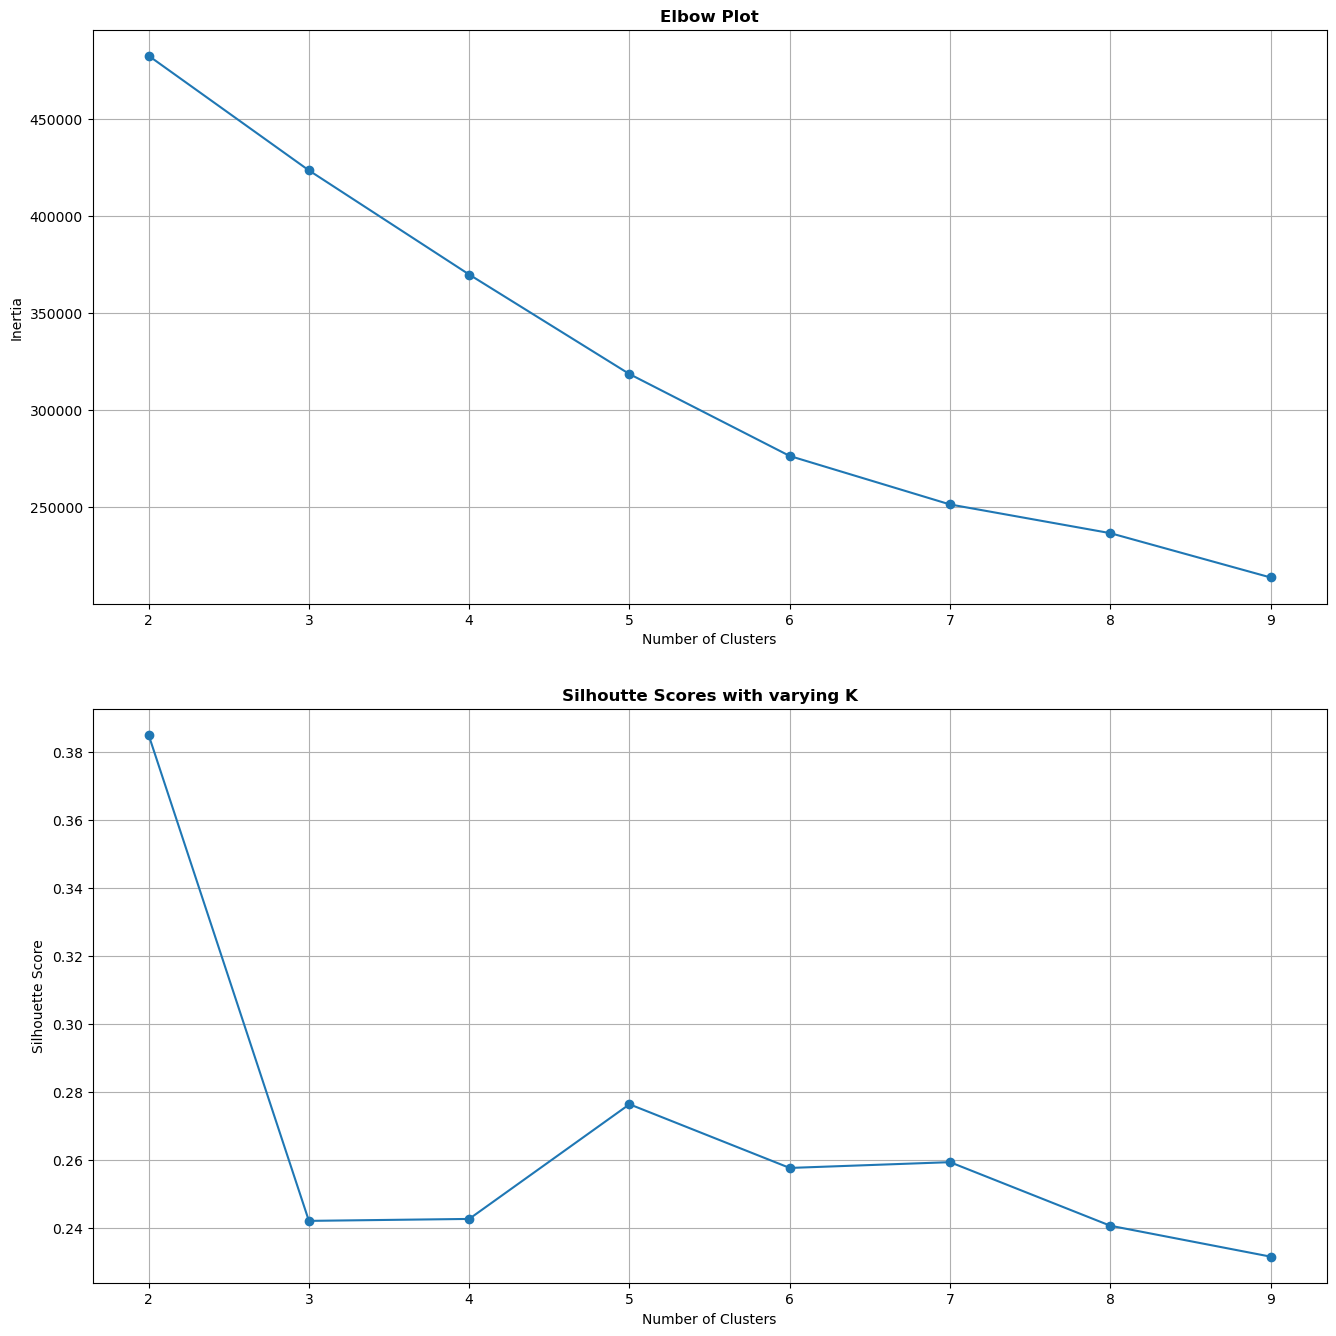

In [147]:
optimise_k_means(new_data2, 10)

In [148]:
#Applying kmeans with n_clusters= 2 
kmeans_data= new_data.copy(deep=True)

#Applying KMeans with n_clusters = 2
kmeans = KMeans(n_clusters=2, random_state=42)  # Always set a random_state for reproducibility
kmeans.fit(new_data2)

# Add KMeans cluster labels to the DataFrame
kmeans_data["KMeans_labels"] = kmeans.labels_

# Calculate the silhouette score
sil_score = silhouette_score(new_data2, kmeans_data["KMeans_labels"])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.38


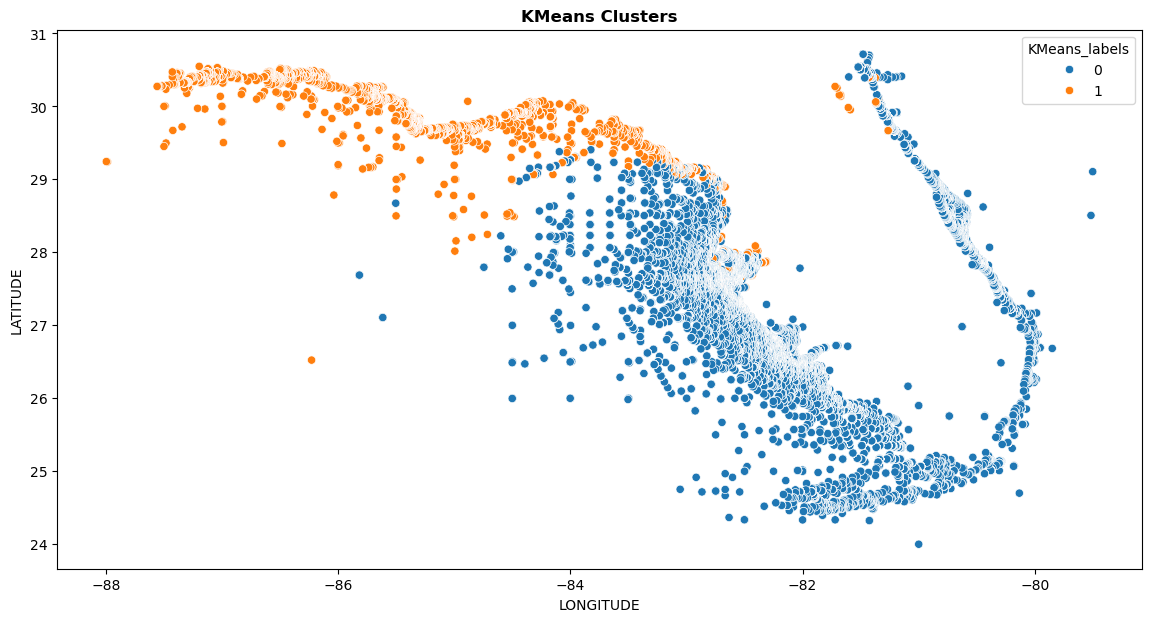

In [149]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=kmeans_data["LONGITUDE"], y=kmeans_data["LATITUDE"], hue= kmeans_data["KMeans_labels"])
plt.title("KMeans Clusters", fontweight='bold')
plt.show()

### DBSCAN

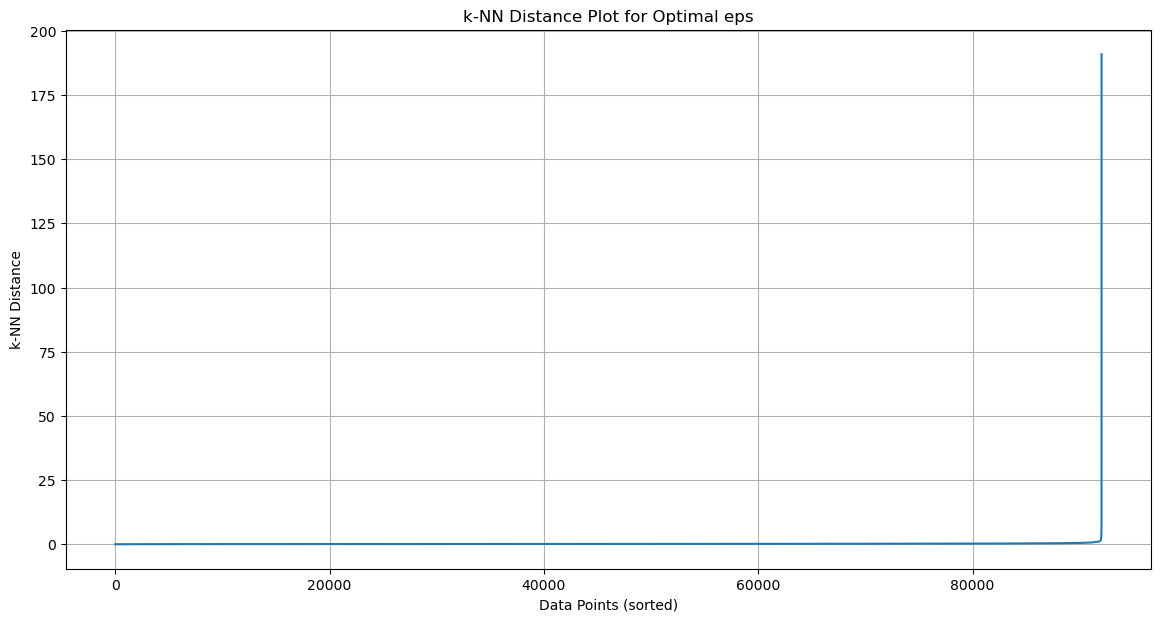

In [150]:
#Findind the optimal eps
neigbors= NearestNeighbors(n_neighbors=5)
neigbors_fit=neigbors.fit(new_data2)
distances, indices= neigbors_fit.kneighbors(new_data2)

#Sorting the distances
distances= np.sort(distances[:,-1])
plt.figure(figsize=(14,7))
plt.plot(distances)
plt.title("k-NN Distance Plot for Optimal eps")
plt.xlabel("Data Points (sorted)")
plt.ylabel("k-NN Distance")
plt.grid()
plt.show()

In [151]:
# Automatically detect the elbow point
kneedle = KneeLocator(range(len(distances)), distances, curve="convex", direction="increasing")
optimal_eps = distances[kneedle.knee]
print(f"Optimal eps: {optimal_eps}")

Optimal eps: 1.5691846769741855


In [152]:
#DBSCAN
dbscan_data= new_data.copy(deep=True)

min_samples = 14  
dbscan = DBSCAN(eps=optimal_eps, min_samples=min_samples)
dbscan_data["DBSCAN_labels"] = dbscan.fit_predict(new_data2)

In [153]:
# Calculate the silhouette score
sil_score = silhouette_score(new_data2, dbscan_data["DBSCAN_labels"])
print(f"Silhouette Score: {sil_score:.2f}")

Silhouette Score: 0.77


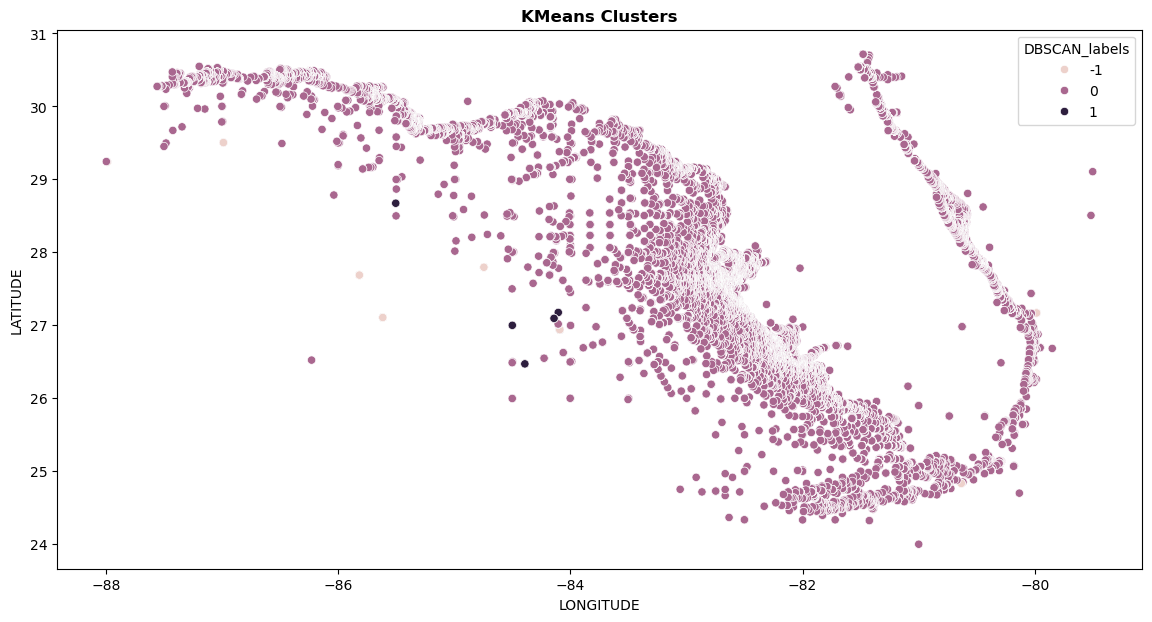

In [154]:
plt.figure(figsize=(14,7))
sns.scatterplot(x=dbscan_data["LONGITUDE"], y=dbscan_data["LATITUDE"], hue= dbscan_data["DBSCAN_labels"])
plt.title("KMeans Clusters", fontweight='bold')
plt.show()

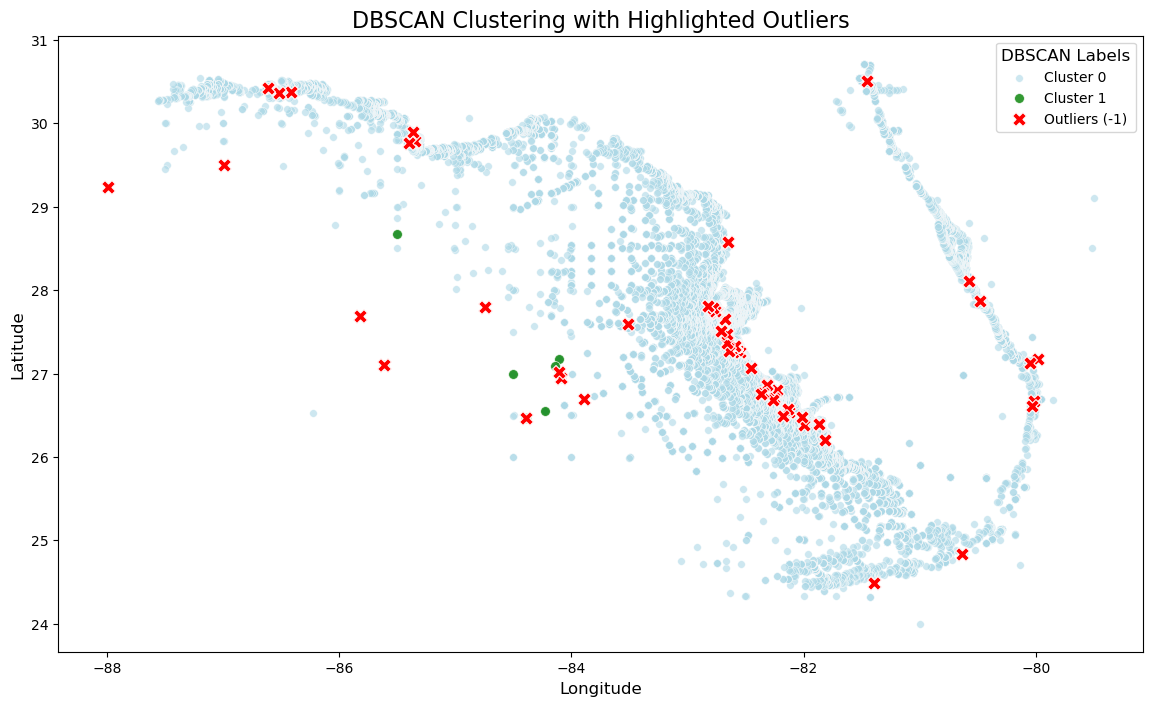

In [155]:
plt.figure(figsize=(14, 8))

# Plot the majority cluster (label = 0)
sns.scatterplot(
    x="LONGITUDE", 
    y="LATITUDE", 
    data=dbscan_data[dbscan_data["DBSCAN_labels"] == 0], 
    color="lightblue", 
    s=30, 
    alpha=0.6, 
    label="Cluster 0"
)

# Plot the minority cluster (label = 1)
sns.scatterplot(
    x="LONGITUDE", 
    y="LATITUDE", 
    data=dbscan_data[dbscan_data["DBSCAN_labels"] == 1], 
    color="green", 
    s=50, 
    alpha=0.8, 
    label="Cluster 1"
)

# Highlight outliers (label = -1)
sns.scatterplot(
    x="LONGITUDE", 
    y="LATITUDE", 
    data=dbscan_data[dbscan_data["DBSCAN_labels"] == -1], 
    color="red", 
    marker="X", 
    s=100, 
    label="Outliers (-1)"
)

# Add plot details
plt.title("DBSCAN Clustering with Highlighted Outliers", fontsize=16)
plt.xlabel("Longitude", fontsize=12)
plt.ylabel("Latitude", fontsize=12)
plt.legend(title="DBSCAN Labels", fontsize=10, title_fontsize=12)

# Show the plot
plt.show()

In [156]:
dbscan_anomalies= dbscan_data[dbscan_data["DBSCAN_labels"]== -1]

In [157]:
dbscan_anomalies

STATE_ID                                    DESCRIPTION  LATITUDE  \
9           FL  St. Lucie Inlet; 9 mi East of 0.625 mi. point  27.16930   
43          FL  Palm Beach; 1 mi East of Bath and Tennis Club  26.67510   
87          FL                         Lake Worth Pier; E end  26.61540   
124         FL   St. Lucie Inlet; 3 mi South and East to 63''  27.12470   
1763        FL           Long Point Park; W of (Indian River)  27.87228   
...        ...                                            ...       ...   
90672       FL                                 James Lee Park  30.38020   
91032       FL                        Destin Pass; 1 mi SW of  30.36936   
91310       FL            Cinco Bayou; South end of 85 bridge  30.42540   
91600       FL                        Northern Gulf of Mexico  29.50400   
92574       FL                        Northern Gulf of Mexico  29.23900   

       LONGITUDE SAMPLE_DATE SAMPLE_TIME  SAMPLE_DEPTH    GENUS SPECIES  \
9      -79.98500  1972-11-16    11:05:00          30.5  Karenia  brevis   
43     -80.01680  1972-11-15    10:15:00          15.2  Karenia  brevis   
87     -80.03500  1972-11-10    13:05:00          20.0  Karenia  brevis   
124    -80.04630  1972-11-13    13:50:00          19.2  Karenia  brevis   
1763   -80.47702  2018-10-23    15:12:00           0.2  Karenia  brevis   
...          ...         ...         ...           ...      ...     ...   
90672  -86.41066  2021-10-25    19:35:00           0.5  Karenia  brevis   
91032  -86.51539  2010-02-17    20:58:00          18.3  Karenia  brevis   
91310  -86.60900  1999-11-02    09:08:00           0.3  Karenia  brevis   
91600  -86.98800  1990-09-05    20:35:00          99.0  Karenia  brevis   
92574  -87.98800  1990-09-06    21:57:00          94.0  Karenia  brevis   

           CATEGORY  CELLCOUNT  SALINITY  WATER_TEMP SAMPLE_MONTH_NAME  \
9               low      16500    35.500       25.50               Nov   
43     not observed          0     3.000       26.00               Nov   
87              low      15000    37.500       26.80               Nov   
124             low      73000    35.000       26.00               Nov   
1763           high   10891062    34.900       26.30               Oct   
...             ...        ...       ...         ...               ...   
90672          high   38425200    32.070       26.50               Oct   
91032  not observed          0    26.400       12.70               Feb   
91310          high   11700000    22.500       20.02               Nov   
91600      very low       1000    26.244       19.75               Sep   
92574  not observed          0    36.333       20.13               Sep   

       SAMPLE_MONTH_NUMBER  SAMPLE_YEAR  DBSCAN_labels  
9                       11         1972             -1  
43                      11         1972             -1  
87                      11         1972             -1  
124                     11         1972             -1  
1763                    10         2018             -1  
...                    ...          ...            ...  
90672                   10         2021             -1  
91032                    2         2010             -1  
91310                   11         1999             -1  
91600                    9         1990             -1  
92574                    9         1990             -1  

[74 rows x 17 columns]

In [178]:
dbscan_anomalies.describe().T

count                           mean                  min  \
LATITUDE             74.0                      27.498432               24.483   
LONGITUDE            74.0                     -83.094537              -87.988   
SAMPLE_DATE            74  2002-01-07 03:34:03.243243264  1957-09-29 00:00:00   
SAMPLE_DEPTH         74.0                      43.818919                  0.2   
CELLCOUNT            74.0                28283359.405405                  0.0   
SALINITY             74.0                      33.948784                  3.0   
WATER_TEMP           74.0                      23.174189                 7.45   
SAMPLE_MONTH_NUMBER  74.0                            8.5                  1.0   
SAMPLE_YEAR          74.0                    2001.351351               1957.0   
DBSCAN_labels        74.0                           -1.0                 -1.0   

                                     25%                  50%  \
LATITUDE                       26.814325              27.3316   
LONGITUDE                       -84.0913            -82.64585   
SAMPLE_DATE          1994-11-13 12:00:00  2007-04-29 12:00:00   
SAMPLE_DEPTH                         0.5                  0.5   
CELLCOUNT                            0.0           23200000.0   
SALINITY                          32.125               34.705   
WATER_TEMP                        20.005                 23.7   
SAMPLE_MONTH_NUMBER                 6.25                  9.5   
SAMPLE_YEAR                       1994.0               2007.0   
DBSCAN_labels                       -1.0                 -1.0   

                                     75%                  max             std  
LATITUDE                         27.7483             30.50813        1.134228  
LONGITUDE                      -82.25865              -79.985        1.736497  
SAMPLE_DATE          2019-11-16 12:00:00  2023-06-05 00:00:00             NaN  
SAMPLE_DEPTH                      27.875                600.0      107.527223  
CELLCOUNT                    38493009.75          388400000.0  49233933.27697  
SALINITY                        35.97075                 86.0       10.259239  
WATER_TEMP                         26.62                 36.8        5.498749  
SAMPLE_MONTH_NUMBER                 11.0                 12.0        3.093298  
SAMPLE_YEAR                       2019.0               2023.0       20.871054  
DBSCAN_labels                       -1.0                 -1.0             0.0

In [179]:
dbscan_anomalies.describe(include="object").T

count unique                      top freq
STATE_ID             74      1                       FL   74
DESCRIPTION          74     55  Bay Dock (Sarasota Bay)    7
SAMPLE_TIME          74     60                 00:00:00    6
GENUS                74      1                  Karenia   74
SPECIES              74      1                   brevis   74
CATEGORY             74      5                     high   47
SAMPLE_MONTH_NAME    74     12                      Nov   22